In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import plotly.express as px
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene
import scipy.stats as stats

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_theme(context='talk', style='whitegrid', palette='pastel')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['figure.autolayout'] = 'true'
plt.rcParams['figure.frameon'] = 'false'
plt.rcParams['axes.spines.left'] = 'false'
plt.rcParams['axes.spines.right'] = 'false'
plt.rcParams['axes.spines.top'] = 'false'
plt.rcParams['legend.fancybox'] = 'false'
plt.rcParams['axes.spines.bottom'] = 'false'
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'bold'
pd.set_option('display.max_columns', 60)

In [510]:
data = pd.read_excel('data.xlsx')
data.head()

,id,year,gender,faculty,teaching_position,position_head,HSE_start,experience_uni,bachelor,specialist,master,degree,HSE_graduate,publications_papers,publications_other,publications_papers_3years,publications_other_3years,publications_papers_5years,publications_other_5years,publications_english,paper_award,courses_total,courses_bachelor,courses_master,courses_minor,courses_magolego,courses_elective,thesis_bachelor,thesis_master,PhD_students,PhD_finished,best_teacher,best_teacher_previous
0,100,y24_25,M,econ,профессор,1,1998,27.0,NaN,1998,1998;1998,PhD (получена в зарубежном вузе); кандидат наук,1,1,0,3,0,4,0,1,0,4,1,1,0,1,0,3,2,2,8,0,6
1,100,y23_24,M,econ,профессор,1,1998,26.0,NaN,1998,1998;1998,PhD (получена в зарубежном вузе); кандидат наук,1,0,0,2,0,5,0,1,0,4,1,1,0,1,0,5,0,2,8,0,6
2,100,y22_23,M,econ,профессор,1,1998,25.0,NaN,1998,1998;1998,PhD (получена в зарубежном вузе); кандидат наук,1,2,0,3,0,5,0,1,0,4,1,1,0,1,0,0,4,1,8,0,6
3,101,y24_25,M,econ,доцент,1,2006,14.0,2005,NaN,2007;2007,кандидат наук,1,1,0,2,0,2,0,1,0,1,1,0,0,0,0,0,0,1,0,0,2
4,101,y23_24,M,econ,доцент,1,2006,13.0,2005,NaN,2007;2007,кандидат наук,1,0,0,1,0,4,0,1,0,2,2,0,0,0,0,0,0,1,0,0,2


In [ ]:
data[(data['courses_total'] != 0) | (data['courses_total'] >= 9)].shape

(677, 33)

In [512]:
data.shape

(2487, 33)

In [513]:
data['year'] = 2000 + data['year'].str[4:6].astype(int)
data.head()

,id,year,gender,faculty,teaching_position,position_head,HSE_start,experience_uni,bachelor,specialist,master,degree,HSE_graduate,publications_papers,publications_other,publications_papers_3years,publications_other_3years,publications_papers_5years,publications_other_5years,publications_english,paper_award,courses_total,courses_bachelor,courses_master,courses_minor,courses_magolego,courses_elective,thesis_bachelor,thesis_master,PhD_students,PhD_finished,best_teacher,best_teacher_previous
0,100,2025,M,econ,профессор,1,1998,27.0,NaN,1998,1998;1998,PhD (получена в зарубежном вузе); кандидат наук,1,1,0,3,0,4,0,1,0,4,1,1,0,1,0,3,2,2,8,0,6
1,100,2024,M,econ,профессор,1,1998,26.0,NaN,1998,1998;1998,PhD (получена в зарубежном вузе); кандидат наук,1,0,0,2,0,5,0,1,0,4,1,1,0,1,0,5,0,2,8,0,6
2,100,2023,M,econ,профессор,1,1998,25.0,NaN,1998,1998;1998,PhD (получена в зарубежном вузе); кандидат наук,1,2,0,3,0,5,0,1,0,4,1,1,0,1,0,0,4,1,8,0,6
3,101,2025,M,econ,доцент,1,2006,14.0,2005,NaN,2007;2007,кандидат наук,1,1,0,2,0,2,0,1,0,1,1,0,0,0,0,0,0,1,0,0,2
4,101,2024,M,econ,доцент,1,2006,13.0,2005,NaN,2007;2007,кандидат наук,1,0,0,1,0,4,0,1,0,2,2,0,0,0,0,0,0,1,0,0,2


### unique teachers:

In [514]:
data['id'].nunique()

829

In [515]:
unique_df = data.drop_duplicates(subset=['id'])

### avg num of samples per teacher:

In [516]:
value_counts = data['id'].value_counts()
average_duplicates = (value_counts - 1).mean()
print(f"Average samples per teacher: {average_duplicates:.2f}")

Average samples per teacher: 2.00


### total rate of rewarded:

In [517]:
data['best_teacher'].describe()

count    2487.000000
mean        0.170889
std         0.376487
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: best_teacher, dtype: float64

### catboost feature importance

In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [519]:
df = pd.read_excel('data.xlsx')

In [520]:
def preprocess_data(df):
    df_clean = df.copy()
    
    df_clean = df_clean[df_clean['HSE_start'] > 0]
    
    
    df_clean['has_degree'] = df_clean['degree'].notna().astype(int)
    df_clean['has_candidate'] = df_clean['degree'].str.contains('кандидат', na=False).astype(int)
    df_clean['has_doctor'] = df_clean['degree'].str.contains('доктор', na=False).astype(int)
    df_clean['has_phd'] = df_clean['degree'].str.contains('phd|PhD', case=False, na=False).astype(int)
    
    for edu_col in ['bachelor', 'specialist', 'master']:
        df_clean[f'has_{edu_col}'] = df_clean[edu_col].notna().astype(int)
    

    df_clean.drop('id', axis=1, inplace=True)
        
    return df_clean


df_processed = preprocess_data(df)


base_features = [
    'gender', 'faculty', 'teaching_position', 'position_head', 'HSE_graduate',
    'publications_english', 'paper_award',
    'has_degree', 'has_candidate', 'has_doctor', 'has_phd',
    'has_bachelor', 'has_specialist', 'has_master',
    'publications_papers', 'publications_other',
    'publications_papers_3years', 'best_teacher_previous',
    'courses_total', 
    'courses_elective',
    'thesis_bachelor', 'thesis_master', 'PhD_students', 'PhD_finished'
]


categorical_features = ['gender', 'faculty', 'teaching_position']

X = df_processed[base_features]
y = df_processed['best_teacher']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model1 = CatBoostClassifier(
    cat_features=categorical_features,
    iterations=1000,
    random_state=42,
    verbose=0,
    auto_class_weights='Balanced'
)

model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
y_proba1 = model1.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred1))
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba1):.4f}")


              precision    recall  f1-score   support

           0       0.91      0.84      0.87       619
           1       0.44      0.61      0.51       128

    accuracy                           0.80       747
   macro avg       0.68      0.72      0.69       747
weighted avg       0.83      0.80      0.81       747

ROC-AUC: 0.8035


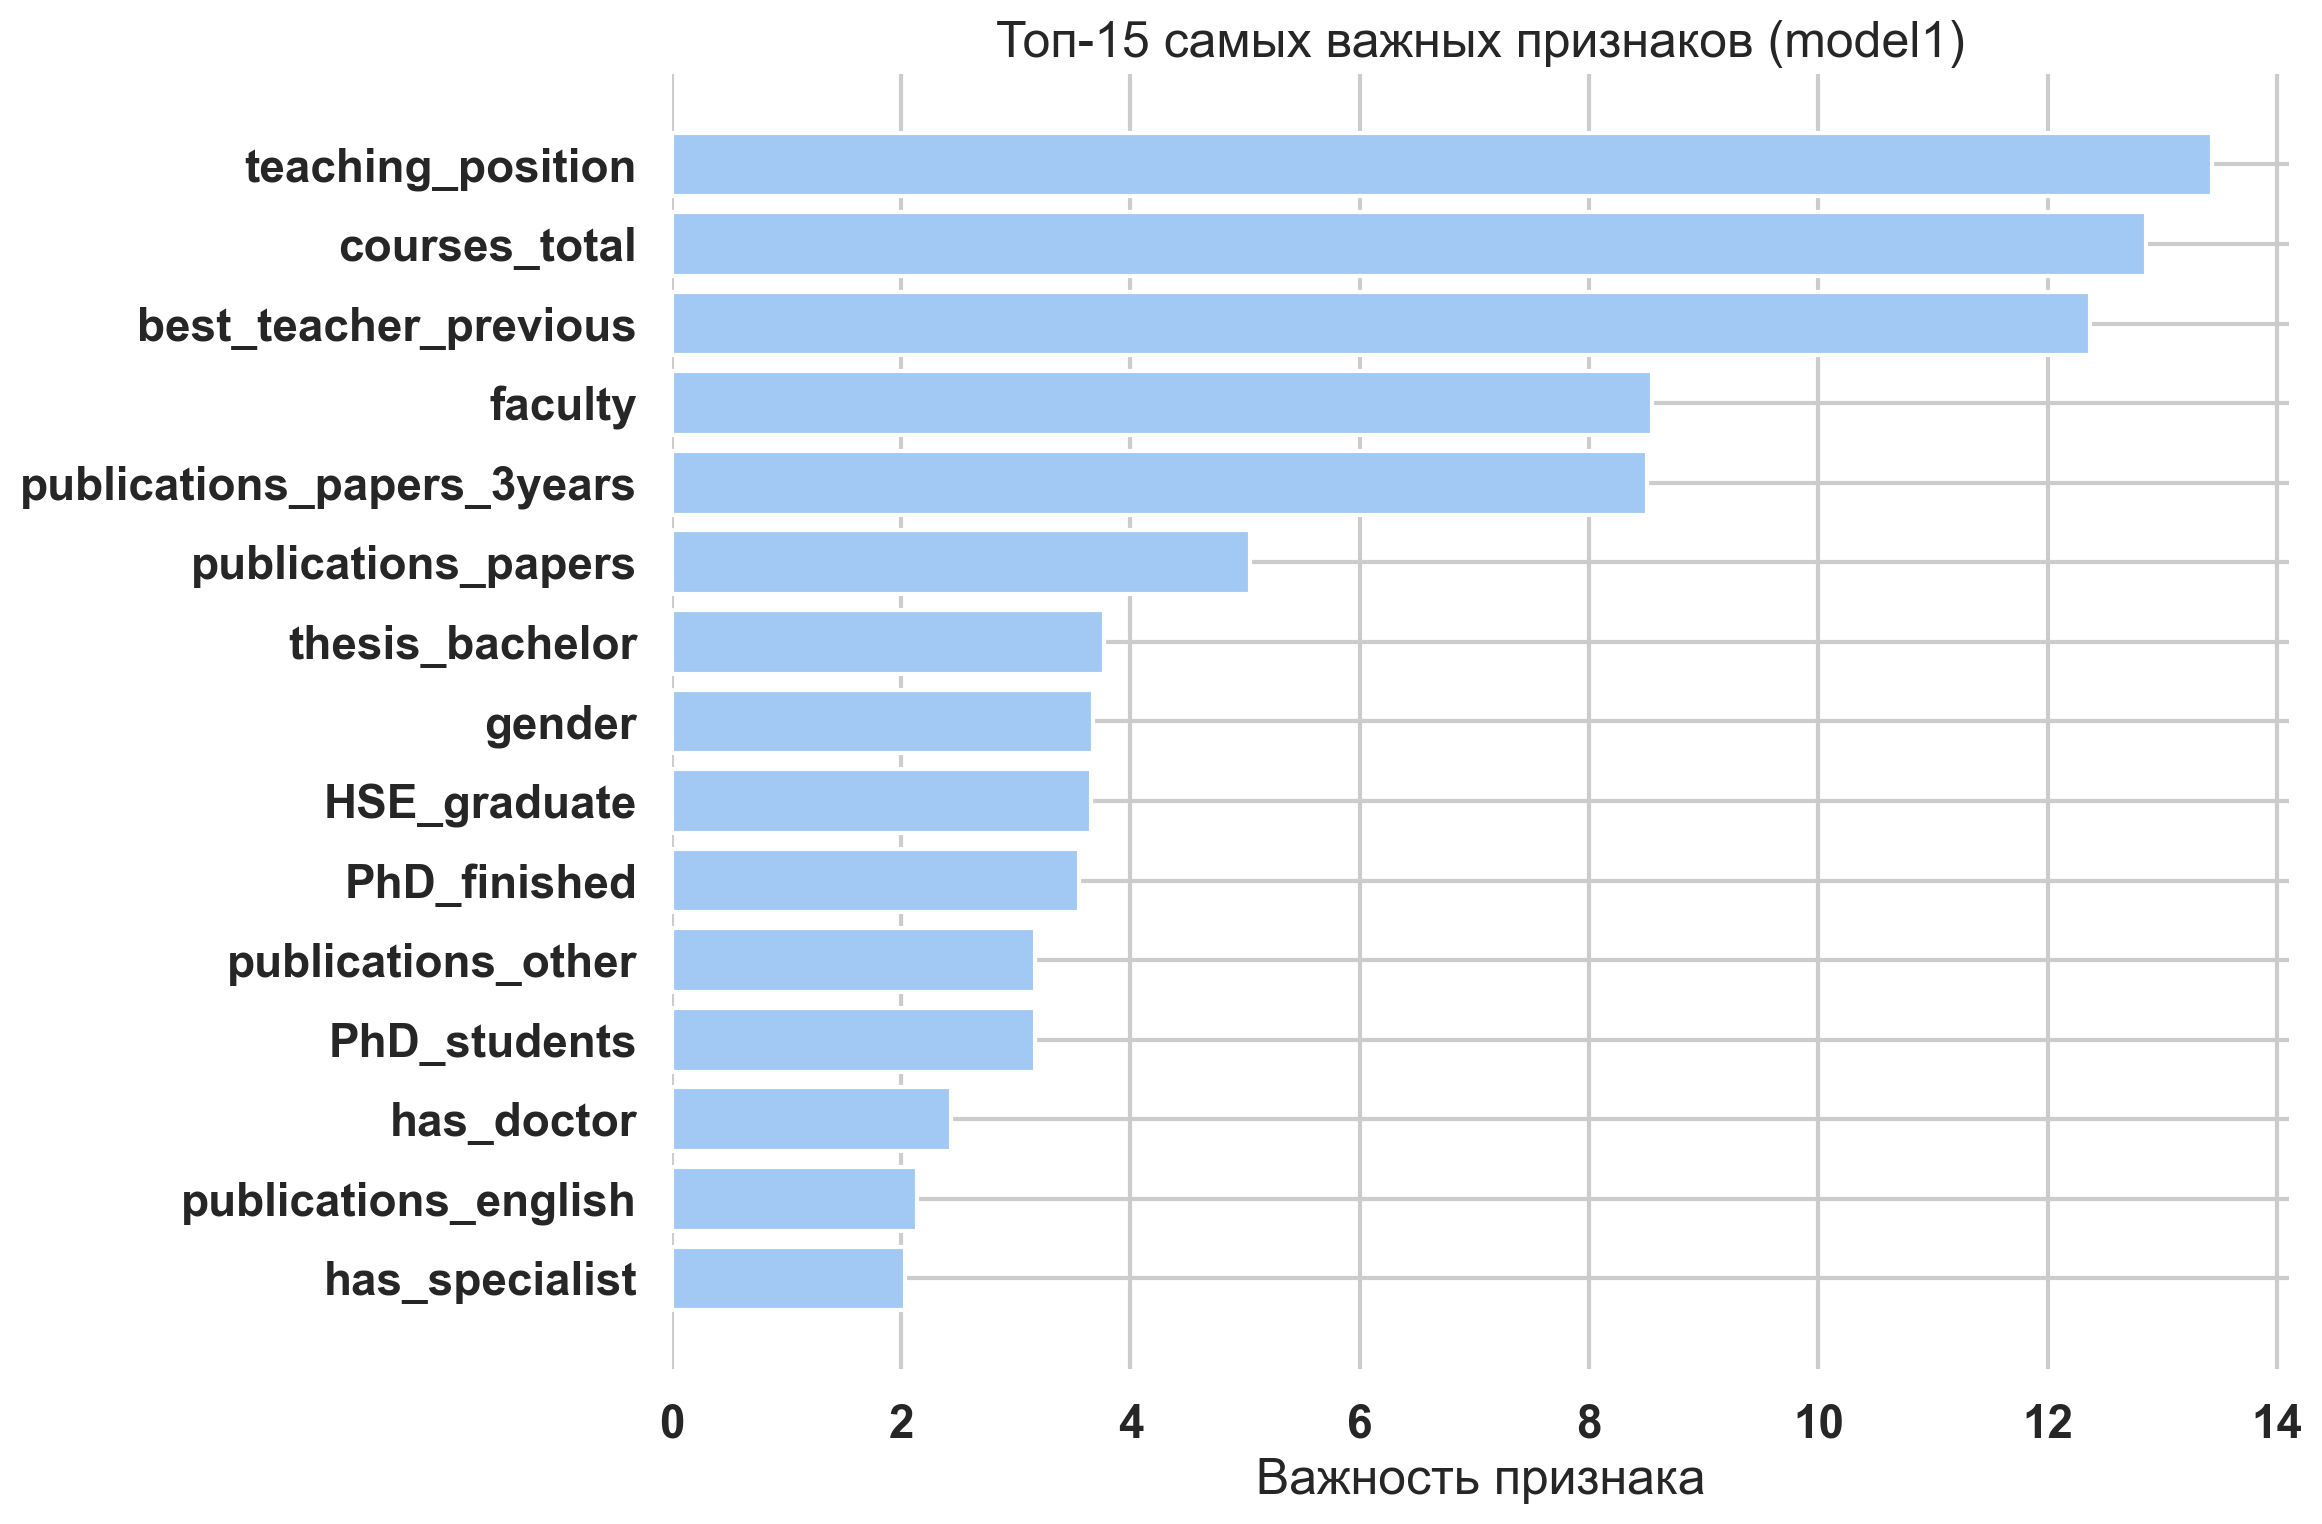

In [521]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

available_features = base_features
available_features = [col for col in available_features if col in df_processed.columns]


def get_feature_importance(model, feature_names, model_name=""):
    """Получение важности признаков из модели CatBoost"""
    feature_importance = model.feature_importances_
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    return importance_df

importance_df = get_feature_importance(model1, available_features, "model1")

def plot_feature_importance(importance_df, model_name, top_n=15):
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(top_n)
    
    bars = plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Важность признака')
    plt.title(f'Топ-{top_n} самых важных признаков ({model_name})')
    plt.gca().invert_yaxis()  
    
    plt.tight_layout()
    plt.show()

if importance_df is not None:
    plot_feature_importance(importance_df, "model1")

### faculties:

([<matplotlib.axis.XTick at 0x16a136350>,
 [Text(0, 0, 'гум.'), Text(1, 0, 'экономич.'), Text(2, 0, 'матем.')])

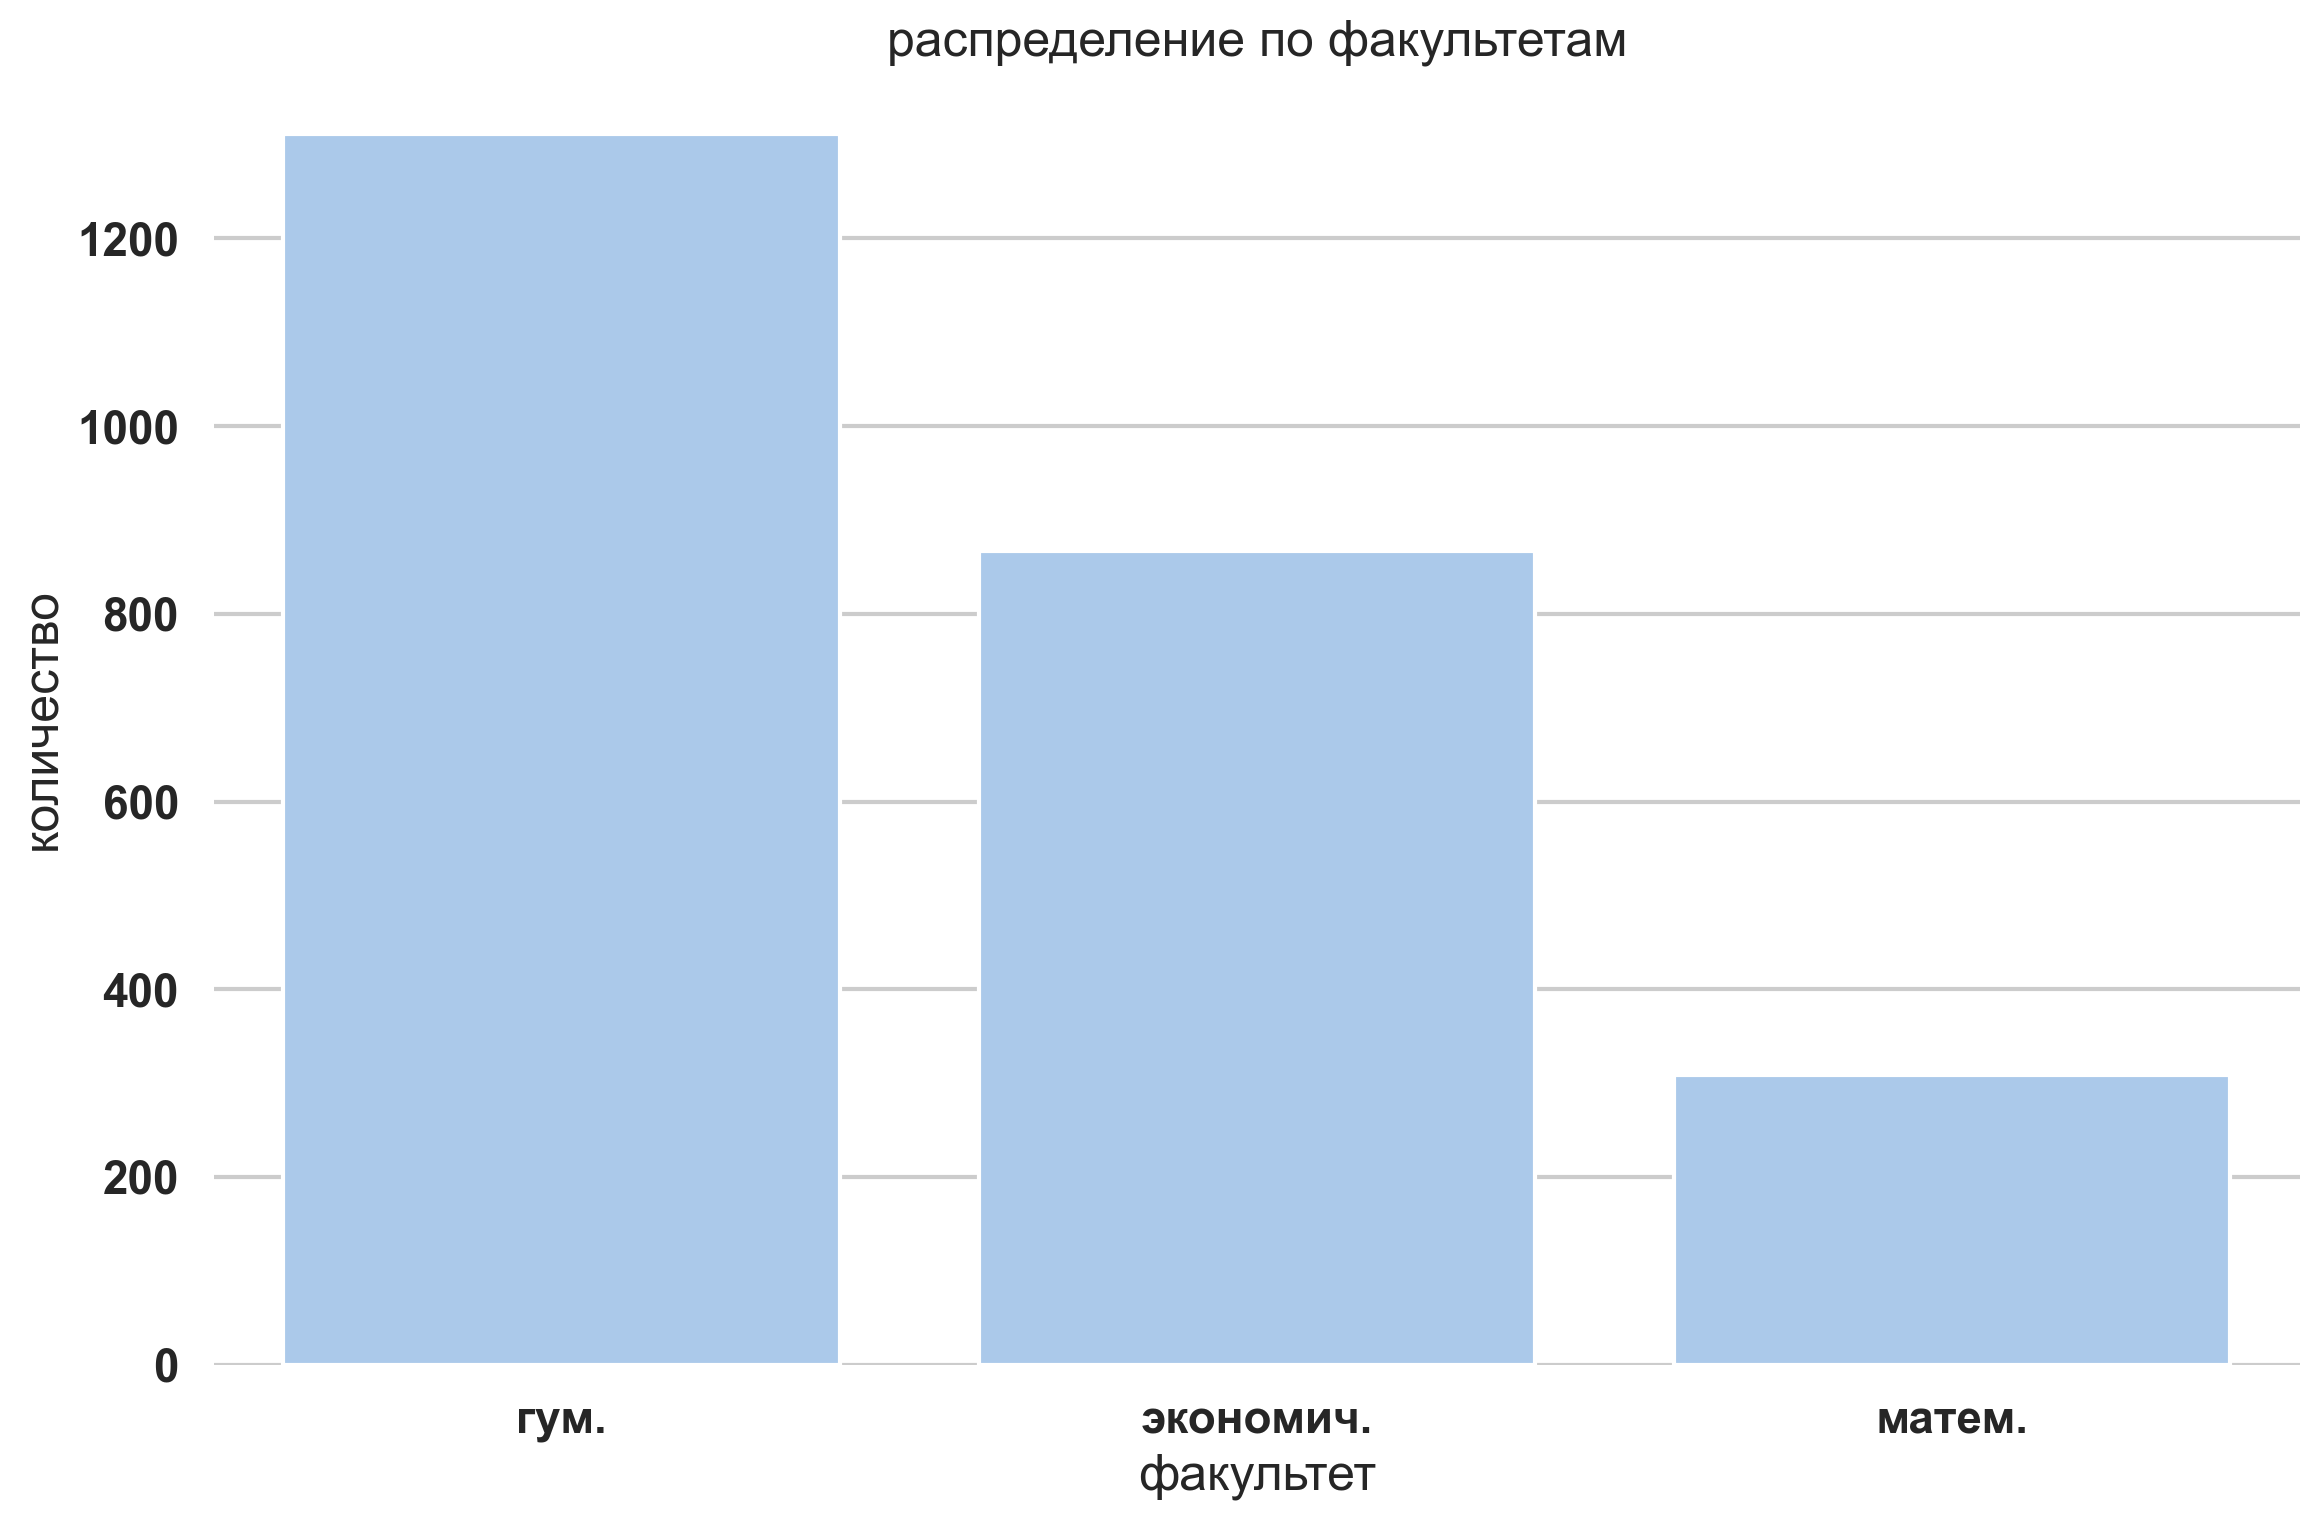

In [522]:
vc = data['faculty'].value_counts()
sns.barplot(vc)
plt.xlabel('факультет')
plt.ylabel('количество')
plt.title('распределение по факультетам')
plt.xticks([0, 1, 2], ['гум.', 'экономич.', 'матем.'])

### best teacher percentage by faculty

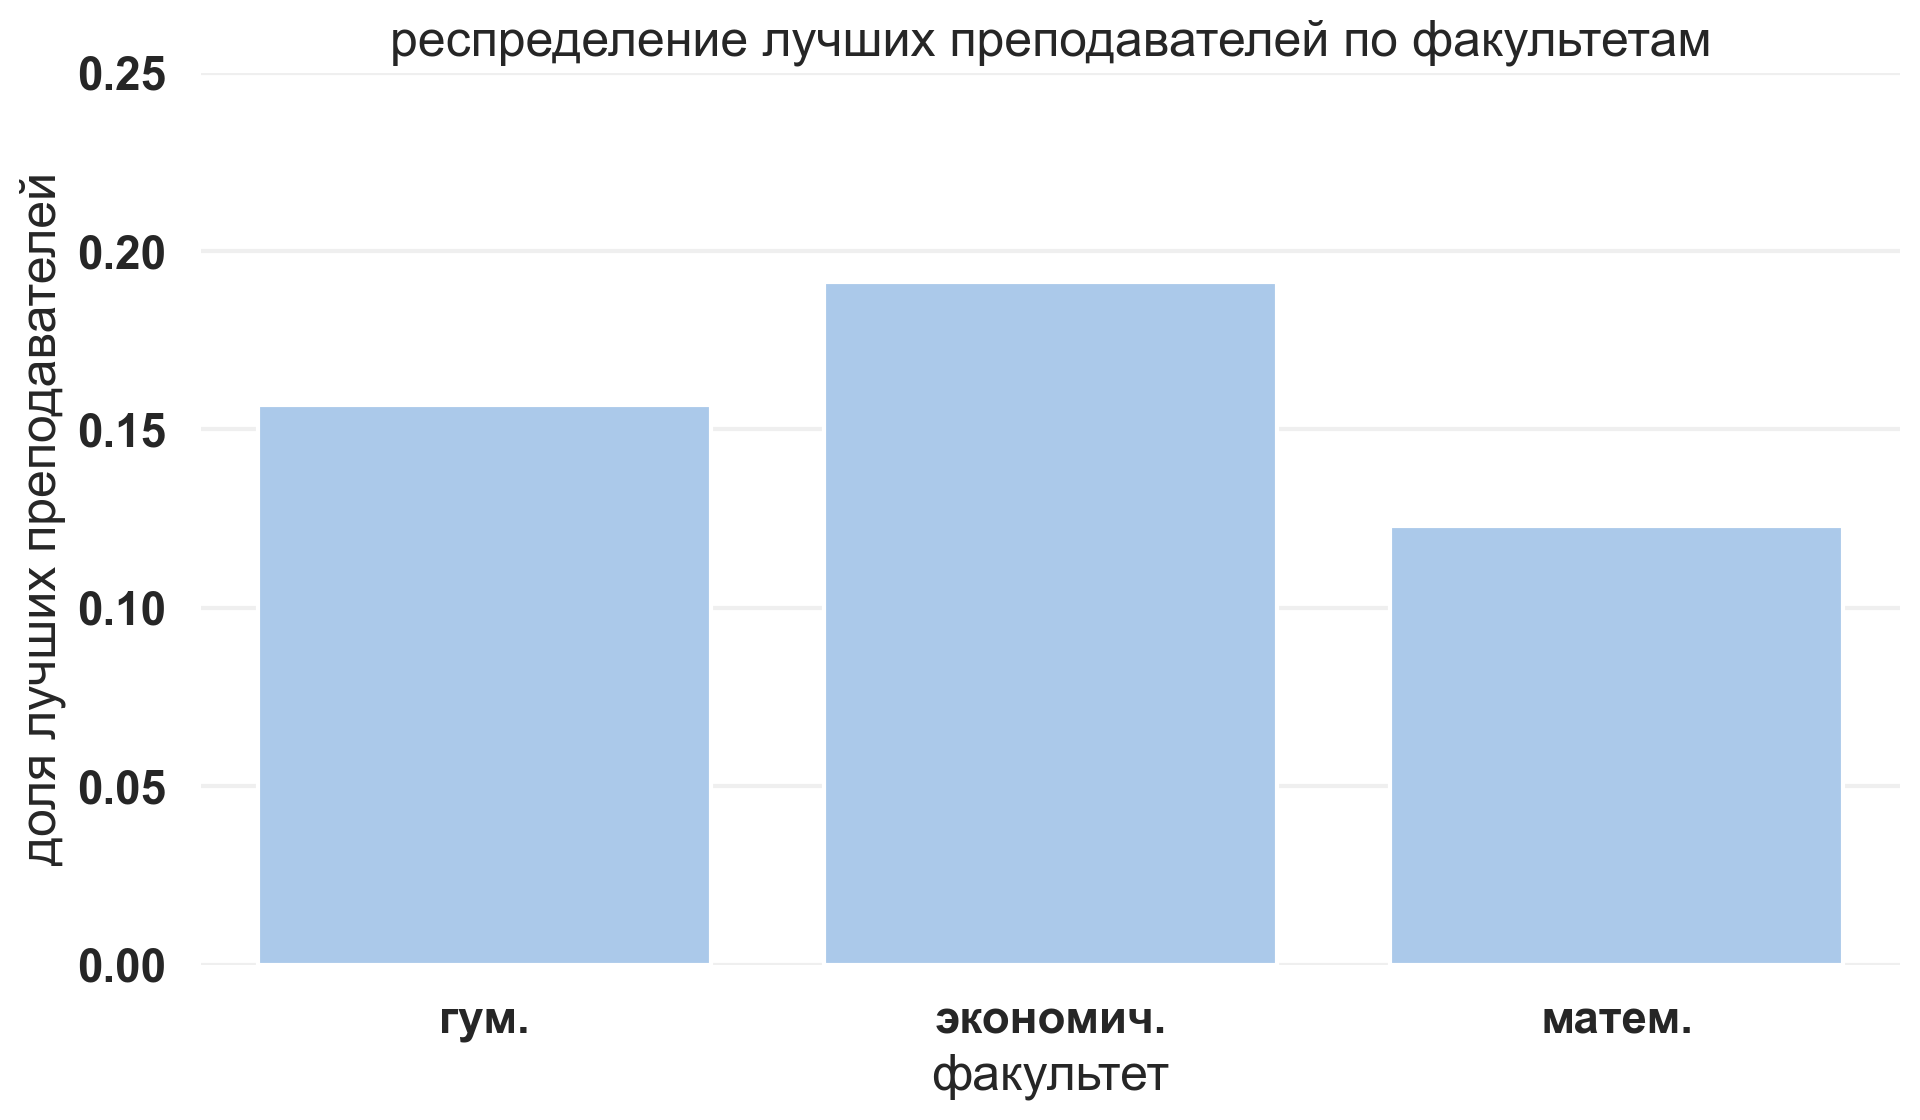

In [523]:
rate_by_faculty = data.groupby('faculty')['best_teacher'].mean().reset_index()
rate_by_faculty.columns = ['faculty', 'rate_best_teacher']


plt.figure(figsize=(10, 6))
sns.barplot(data=rate_by_faculty, x='faculty', y='rate_best_teacher')
plt.title('респределение лучших преподавателей по факультетам')
plt.ylabel('доля лучших преподавателей')
plt.xlabel('факультет')
plt.xticks([0, 1, 2], ['гум.', 'экономич.', 'матем.'])
plt.ylim(0, 0.25)
plt.grid(axis='y', alpha=0.3)
plt.show()
 

### teaching positions

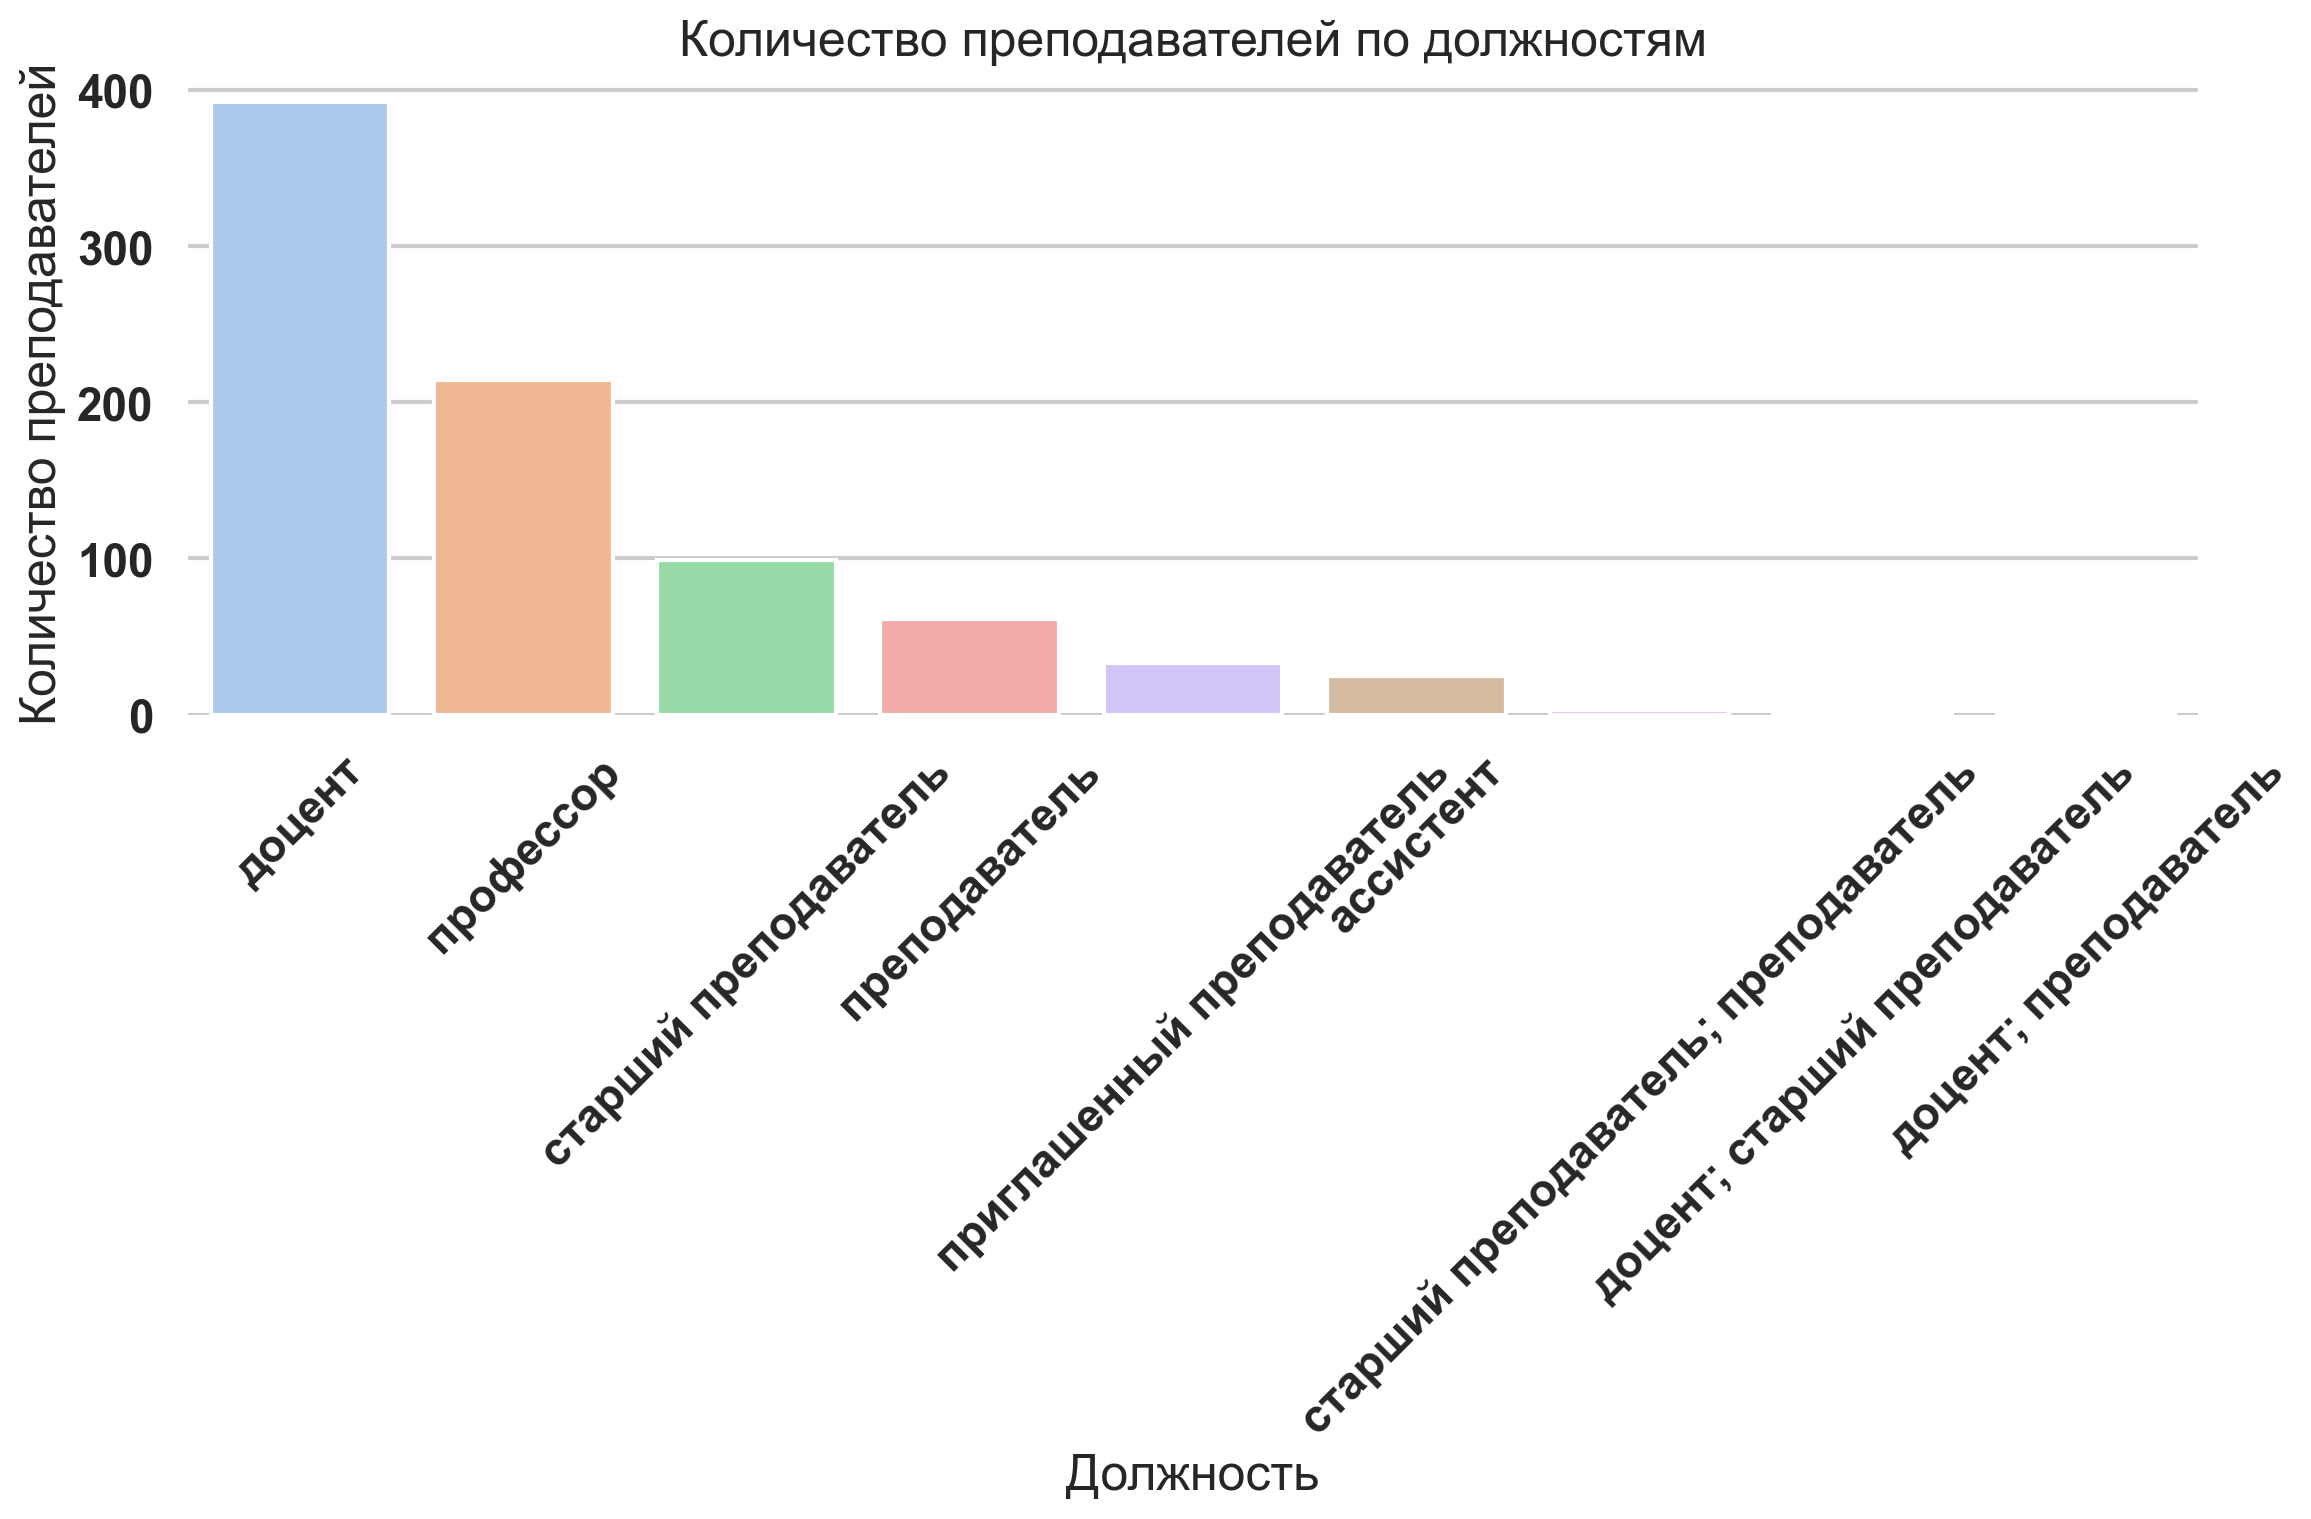

In [527]:
teachers_df = data.drop_duplicates(subset=['id'])
poses = teachers_df['teaching_position'].value_counts()
sns.barplot(x=poses.index, y=poses.values, palette='pastel')
plt.title('Количество преподавателей по должностям')
plt.xlabel('Должность')
plt.ylabel('Количество преподавателей')
plt.xticks(rotation=45)
plt.show()


                      teaching_position  total_teachers  best_count  \
8  старший преподаватель; преподаватель               3           2   
0                             ассистент              25           5   
1                                доцент             392          72   
7                 старший преподаватель              99          18   
4                         преподаватель              61          11   
6                             профессор             214          22   
5            приглашенный преподаватель              33           2   
2                 доцент; преподаватель               1           0   
3         доцент; старший преподаватель               1           0   

   best_share  
8    0.666667  
0    0.200000  
1    0.183673  
7    0.181818  
4    0.180328  
6    0.102804  
5    0.060606  
2    0.000000  
3    0.000000  


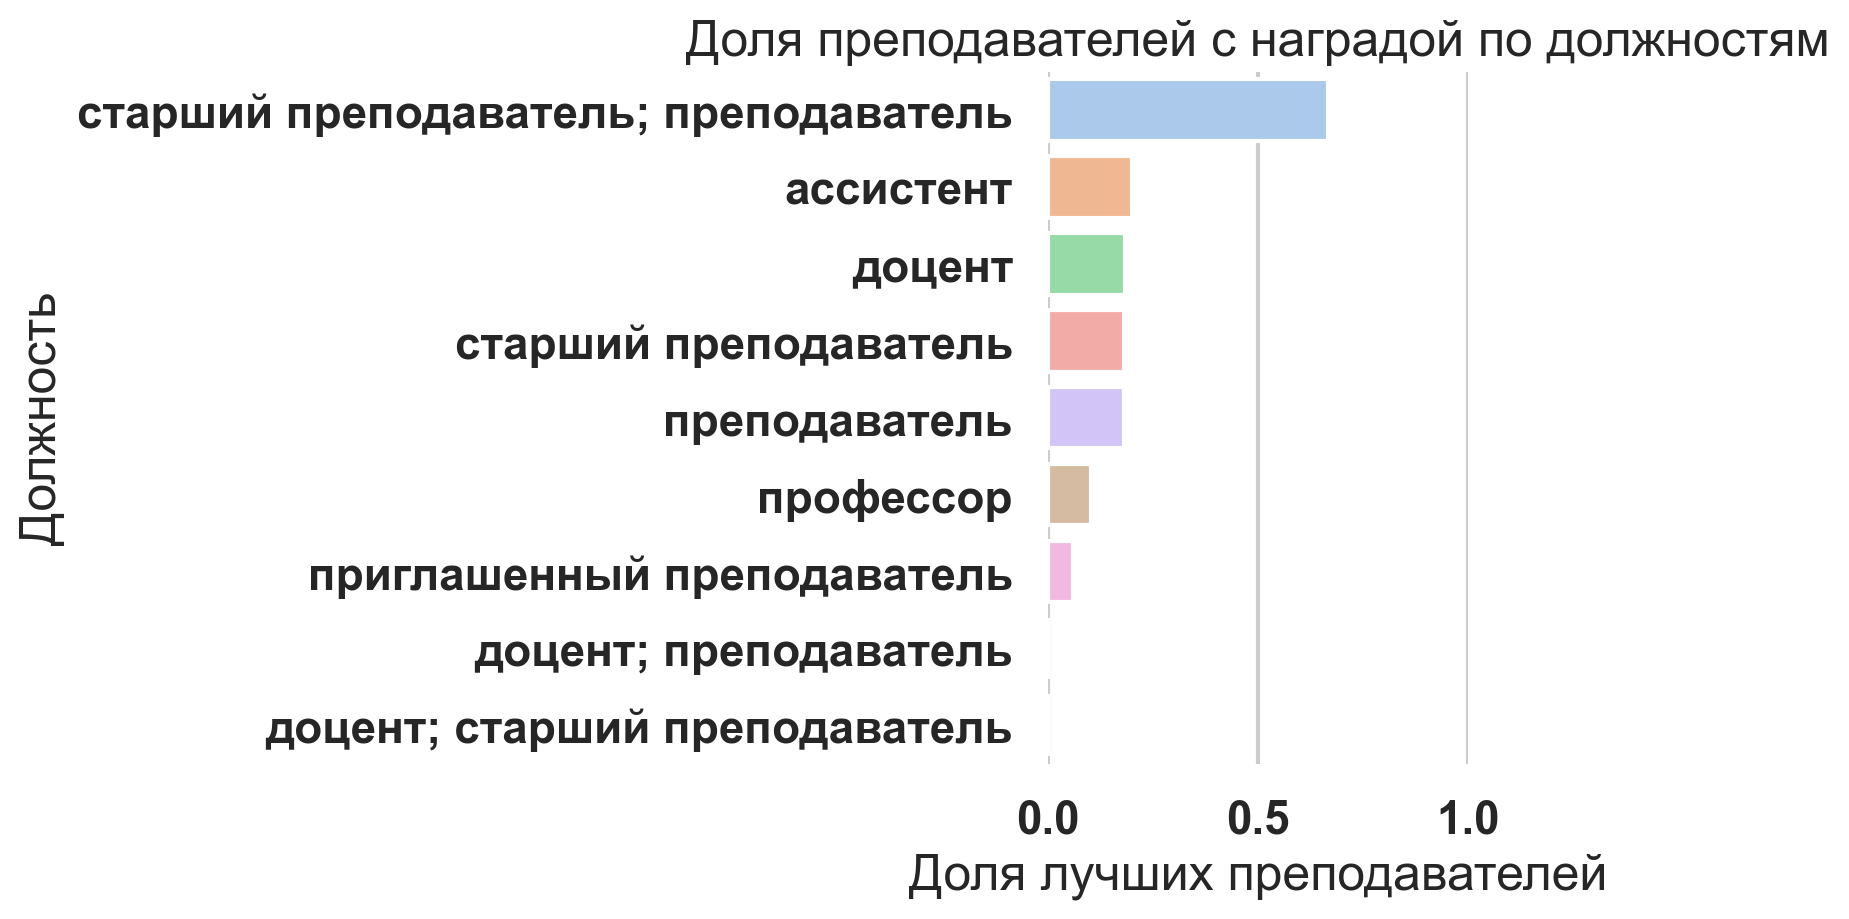

In [528]:
position_stats = teachers_df.groupby('teaching_position').agg(
    total_teachers=('id', 'count'),
    best_count=('best_teacher', 'sum')
).reset_index()

position_stats['best_share'] = position_stats['best_count'] / position_stats['total_teachers']

position_stats = position_stats.sort_values('best_share', ascending=False)

print(position_stats)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x='best_share', y='teaching_position', data=position_stats, palette='pastel')
plt.xlabel('Доля лучших преподавателей')
plt.ylabel('Должность')
plt.title('Доля преподавателей с наградой по должностям')
plt.xlim(0, 1)
plt.show()


### amount of courses

In [535]:
data['courses_total'].value_counts()

courses_total
0     385
2     294
3     286
4     261
5     244
1     238
6     212
7     145
8     130
9      74
11     50
10     47
12     35
13     23
16     20
14     10
15      9
17      6
18      5
19      4
20      3
27      2
21      2
28      1
25      1
Name: count, dtype: int64

In [536]:
df = df[(df['courses_total'] < 10) & (df['courses_total'] > 0)] # clean irrelevant values

<Axes: xlabel='best_teacher', ylabel='courses_total'>

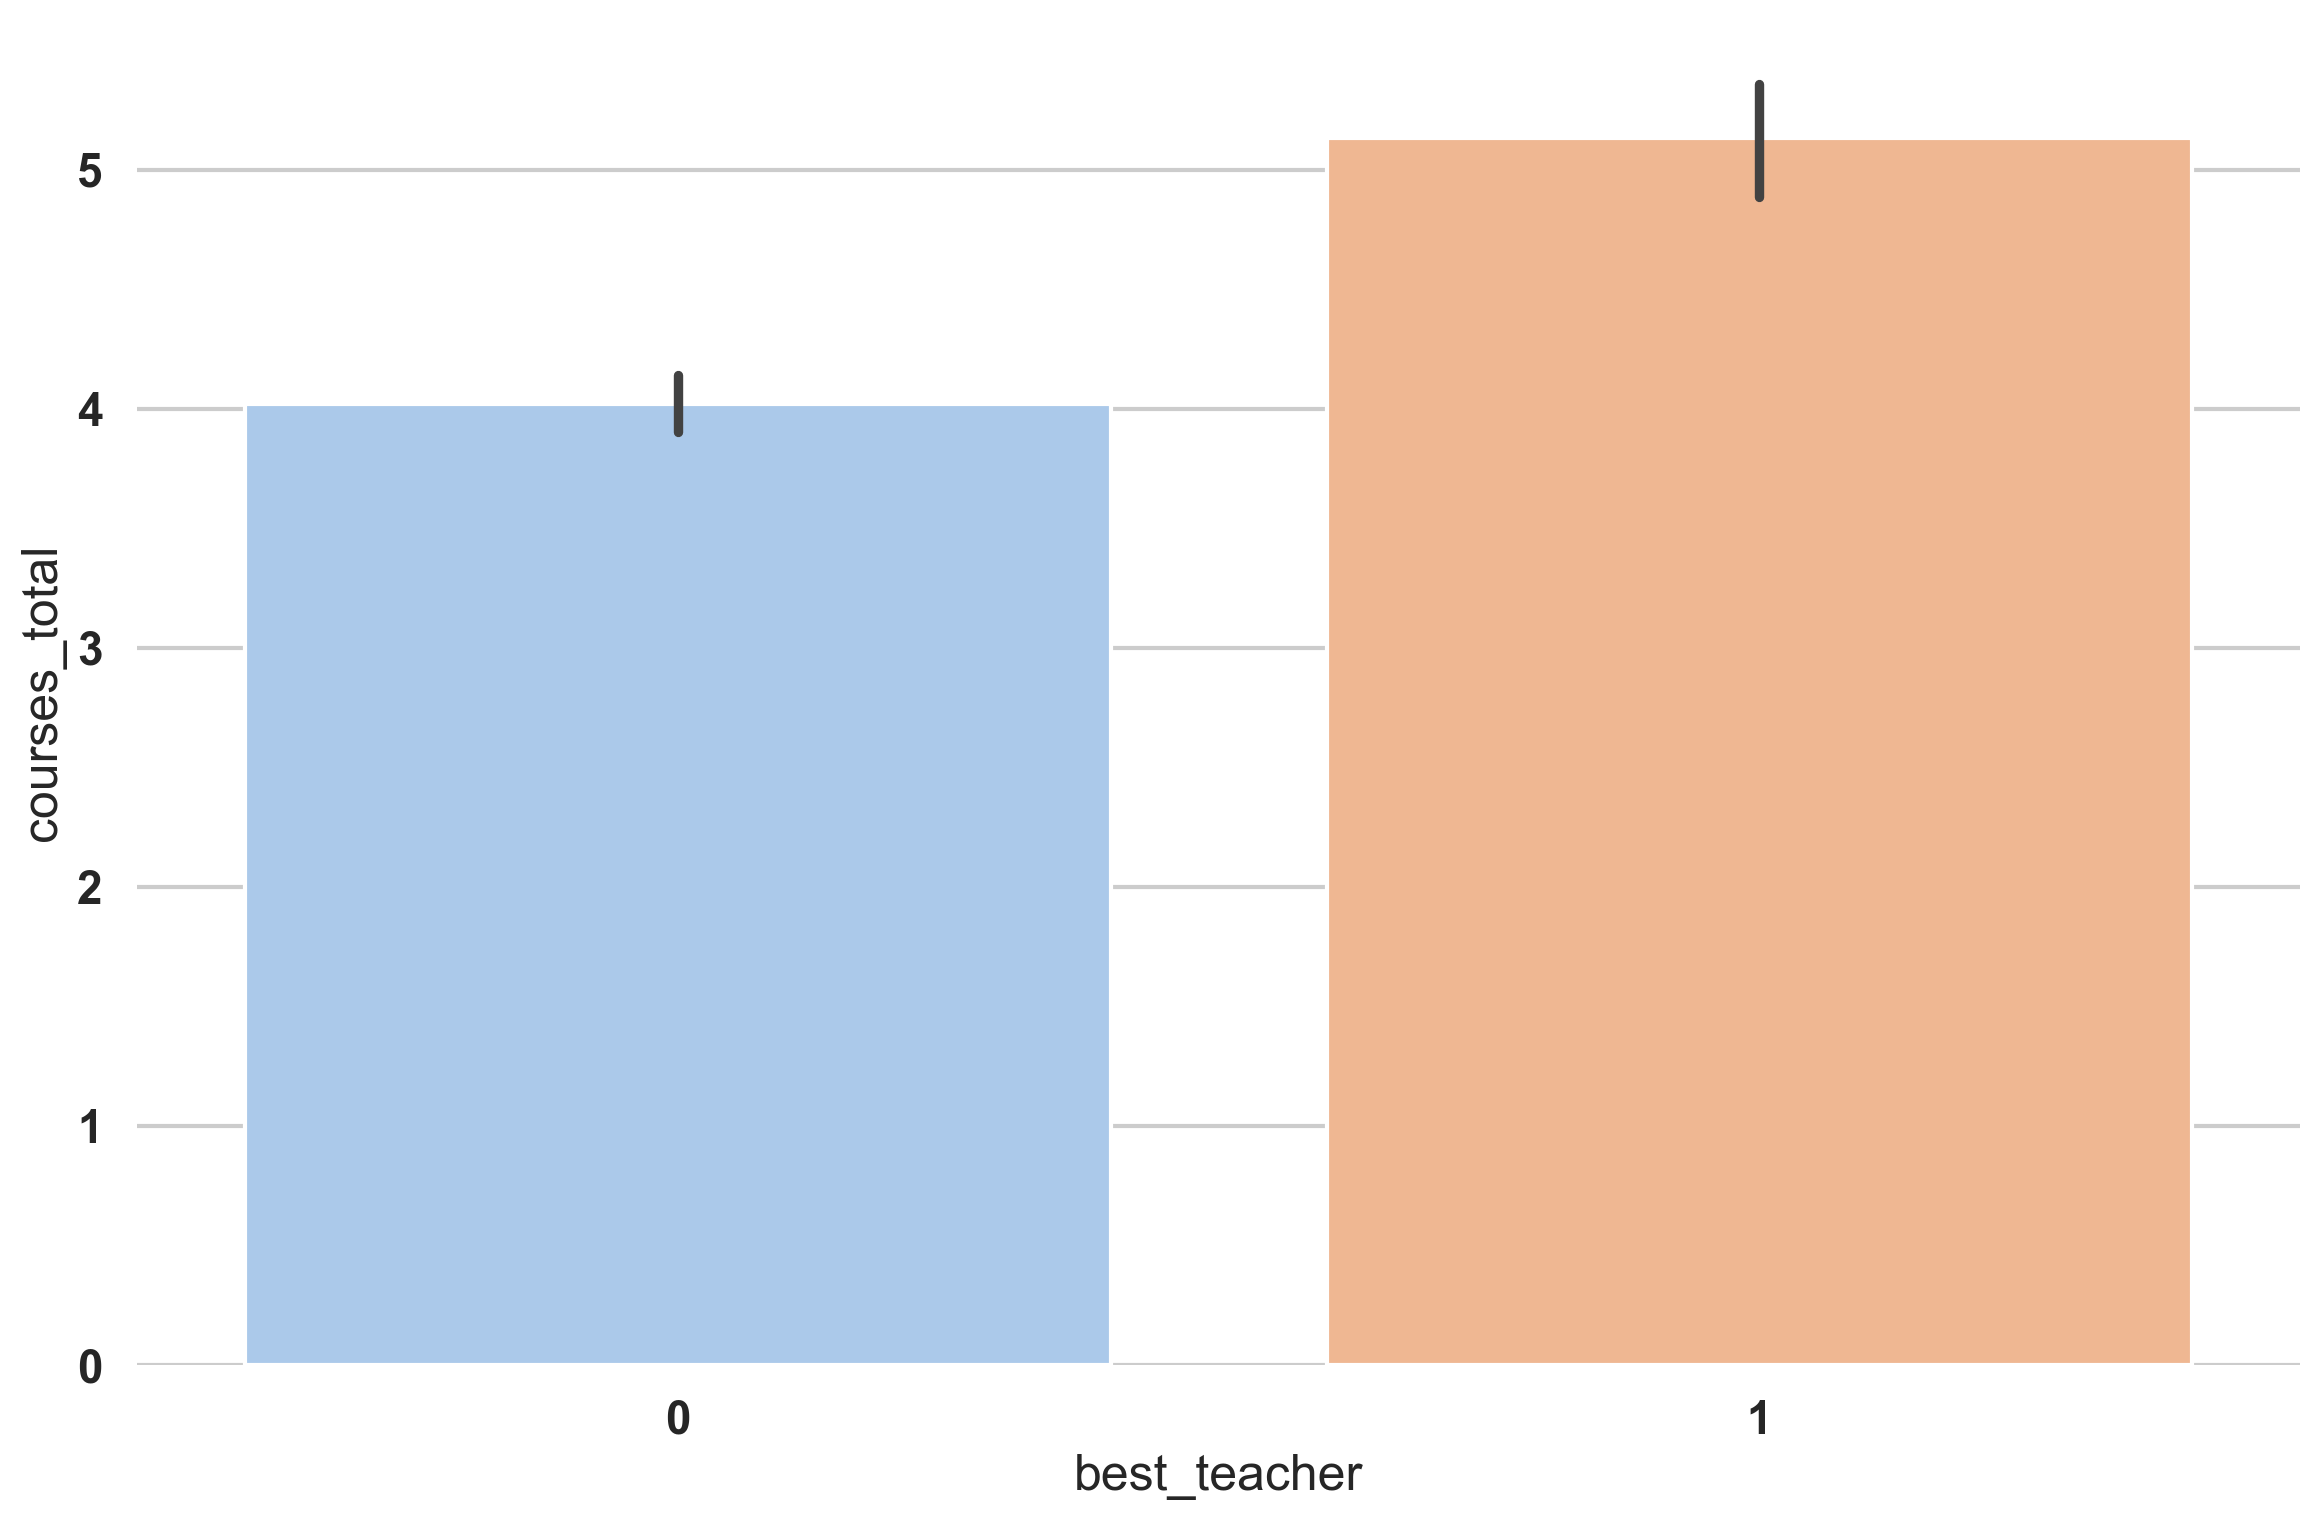

In [537]:
sns.barplot(
    data=df,
    y='courses_total',
    x='best_teacher',
    palette='pastel')

In [539]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro

# Предположим, что у тебя есть DataFrame df с колонками:
df = pd.read_excel('data.xlsx')

# Параметры бутстрепа
n_bootstrap = 1000  # количество повторов
sample_size = 75  # если None — берём столько же, сколько в подгруппе

df = df[(df['courses_total'] != 0) & (df['courses_total'] <= 9)]


# Разделяем данные на две группы
group0 = df.loc[df['best_teacher'] == 0, 'courses_total'].dropna().values
group1 = df.loc[df['best_teacher'] == 1, 'courses_total'].dropna().values

# Функция для бутстрепа: создаёт распределение выборочных средних
def bootstrap_means(data, n_bootstrap=1000, sample_size=None):
    n = len(data) if sample_size is None else sample_size
    return np.array([
        np.mean(np.random.choice(data, size=n, replace=True))
        for _ in range(n_bootstrap)
    ])

# Собираем выборочные средние
boot_means_0 = bootstrap_means(group0, n_bootstrap, sample_size)
boot_means_1 = bootstrap_means(group1, n_bootstrap, sample_size)

# Проверяем нормальность распределения средних (тест Шапиро–Уилка)
shapiro_0 = shapiro(boot_means_0)
shapiro_1 = shapiro(boot_means_1)

print("=== Проверка нормальности распределения выборочных средних ===")
print(f"Группа best_teacher=0: статистика={shapiro_0.statistic:.4f}, p-value={shapiro_0.pvalue:.4f}")
print(f"Группа best_teacher=1: статистика={shapiro_1.statistic:.4f}, p-value={shapiro_1.pvalue:.4f}")

if shapiro_0.pvalue > 0.05:
    print("→ Для группы 0: распределение средних НЕ отличается от нормального.")
else:
    print("→ Для группы 0: распределение средних отклоняется от нормального.")

if shapiro_1.pvalue > 0.05:
    print("→ Для группы 1: распределение средних НЕ отличается от нормального.")
else:
    print("→ Для группы 1: распределение средних отклоняется от нормального.")

=== Проверка нормальности распределения выборочных средних ===
Группа best_teacher=0: статистика=0.9988, p-value=0.7503
Группа best_teacher=1: статистика=0.9955, p-value=0.0052
→ Для группы 0: распределение средних НЕ отличается от нормального.
→ Для группы 1: распределение средних отклоняется от нормального.


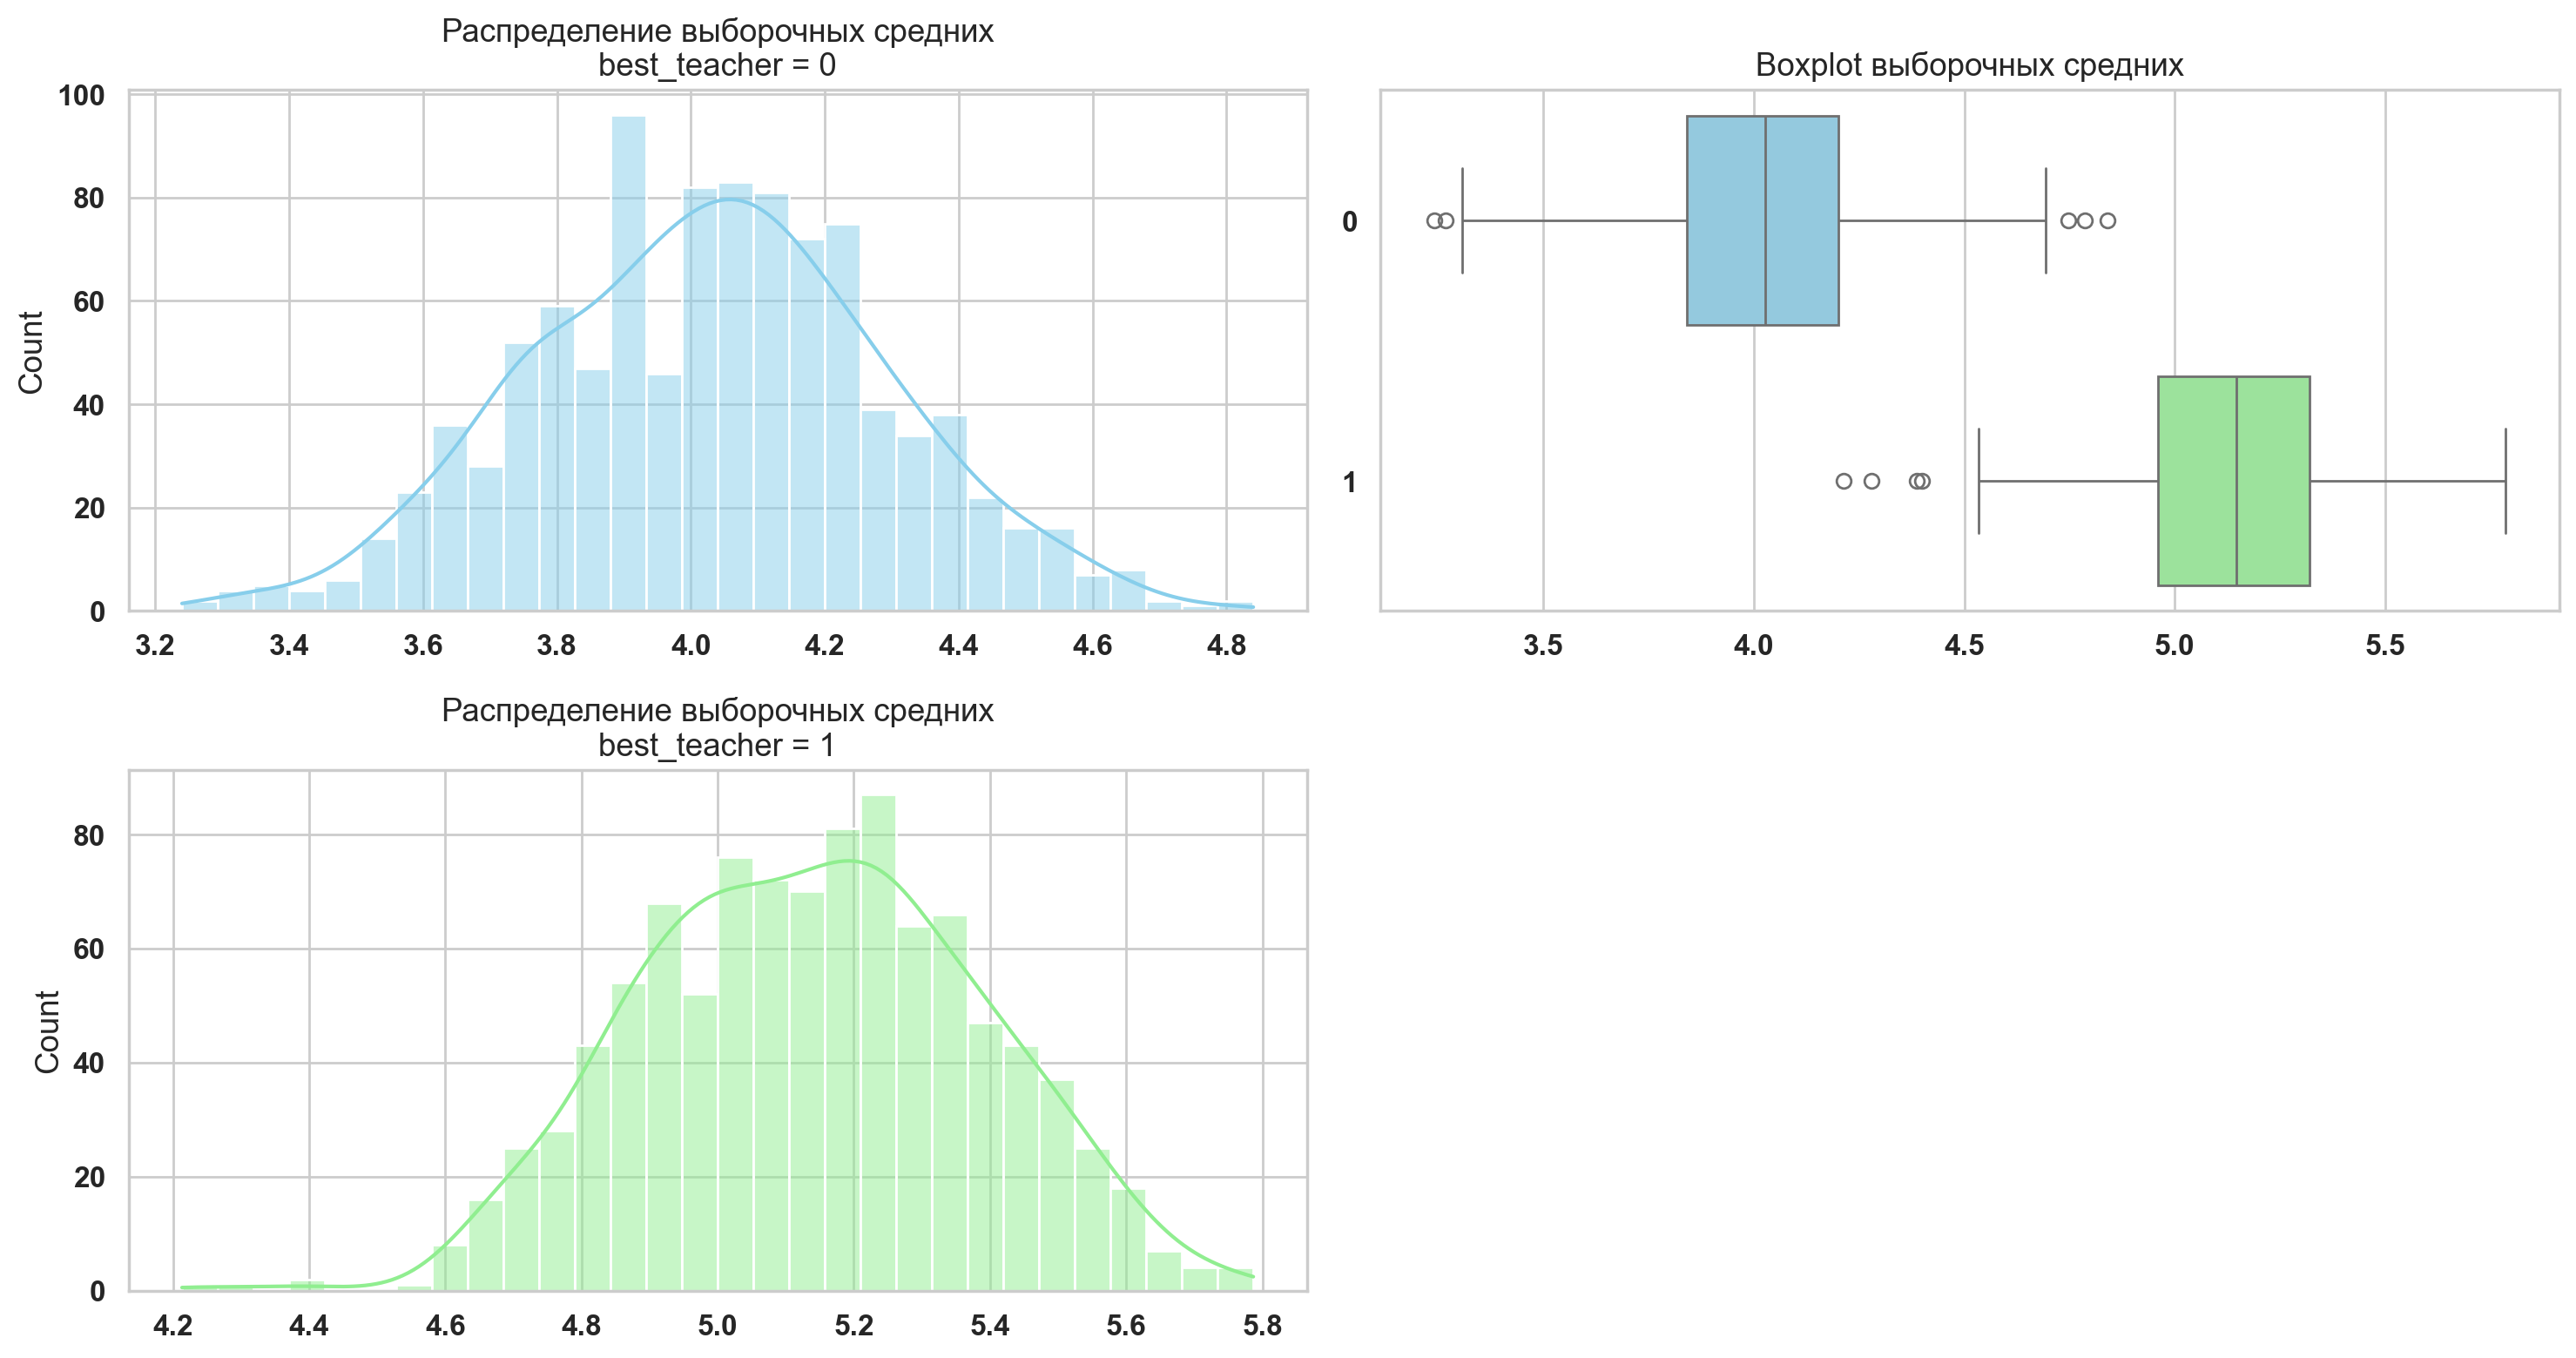

In [540]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Настройки внешнего вида
sns.set(style="whitegrid", font_scale=1.1)

fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# === 1. Гистограммы с KDE (оценкой плотности) ===
sns.histplot(boot_means_0, bins=30, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Распределение выборочных средних\nbest_teacher = 0')

sns.histplot(boot_means_1, bins=30, kde=True, color='lightgreen', ax=axes[1, 0])
axes[1, 0].set_title('Распределение выборочных средних\nbest_teacher = 1')

# === 2. Boxplot для сравнения медиан и разброса ===
sns.boxplot(data=[boot_means_0, boot_means_1], orient='h', ax=axes[0, 1], palette=['skyblue', 'lightgreen'])
axes[0, 1].set_yticklabels(['0', '1'])
axes[0, 1].set_title('Boxplot выборочных средних')

# убираем нижний пустой boxplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [556]:
data = pd.read_excel('data.xlsx')

In [557]:
data = data[(data['courses_total'] != 0) | (data['courses_total'] <= 9)]

            teaching_position  t_statistic       p_value  sample_size_head_1  \
0                   ассистент     1.524367  1.644218e-01                   8   
1                      доцент     7.302296  1.897014e-12                 248   
2               преподаватель     1.400932  1.701978e-01                  29   
3  приглашенный преподаватель     0.878615  4.698450e-01                   3   
4                   профессор     3.373836  1.075081e-03                  78   
5       старший преподаватель     4.008798  1.603336e-04                  53   

   sample_size_head_0  mean_courses_head_1  mean_courses_head_0  \
0                  67             8.625000             5.194030   
1                 928             6.217742             4.228448   
2                 154             4.965517             3.610390   
3                  96             2.000000             1.114583   
4                 564             5.205128             3.755319   
5                 244             7.6

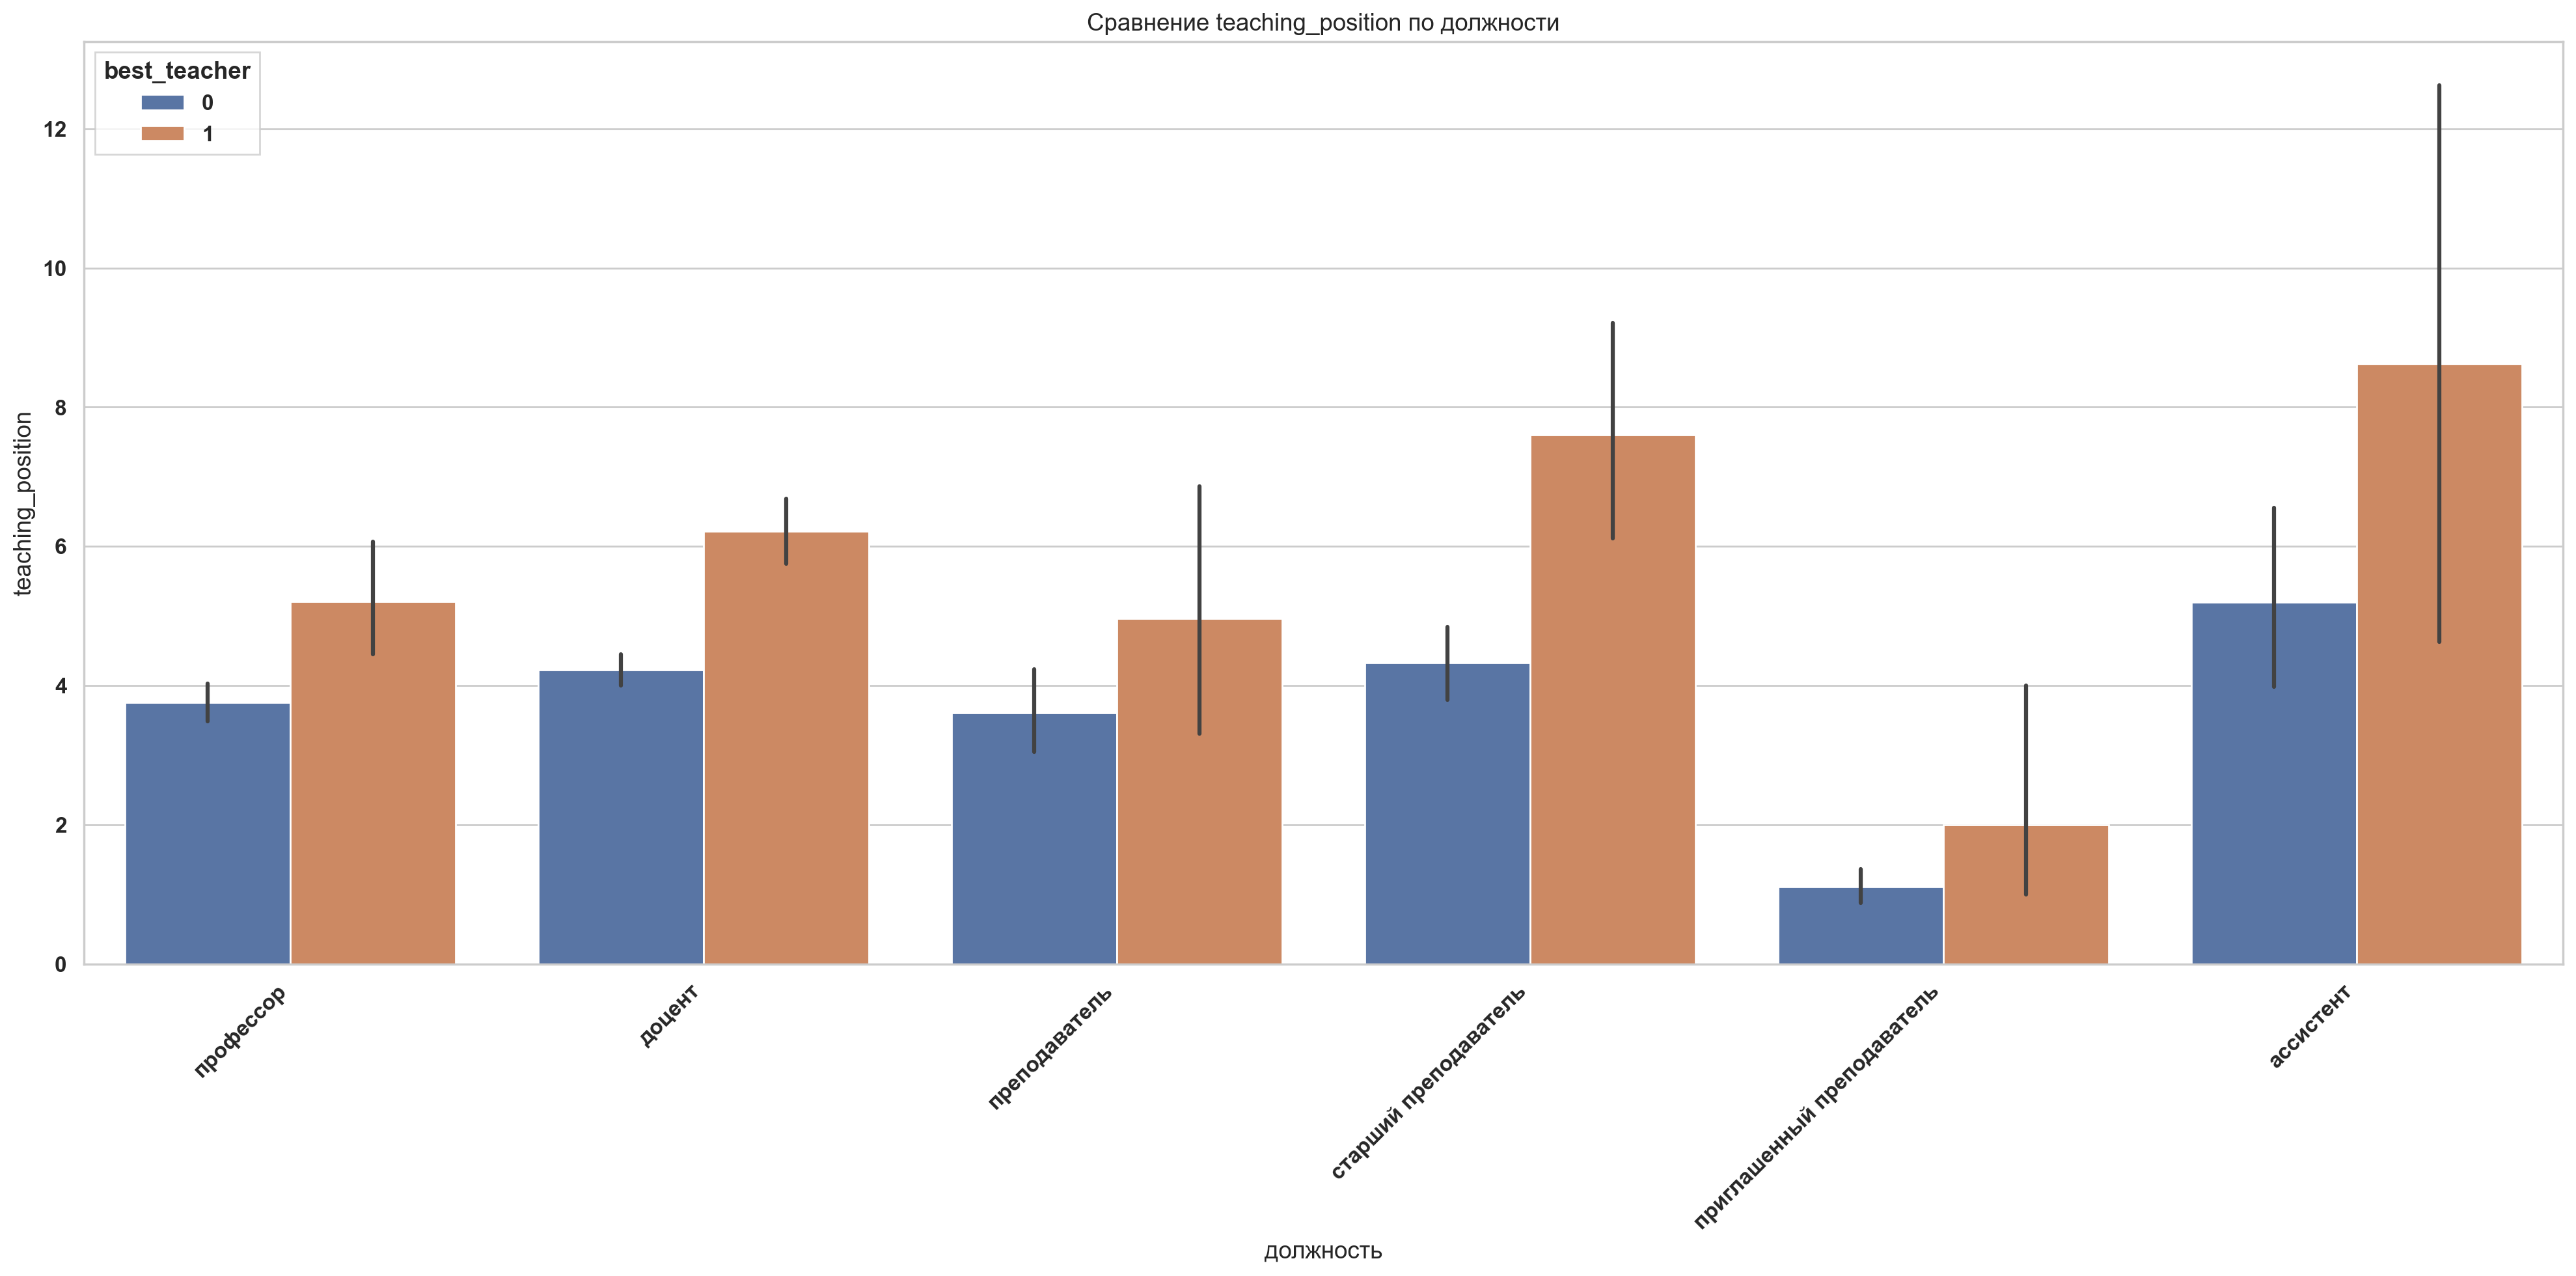

  faculty  t_statistic       p_value  sample_size_head_1  sample_size_head_0  \
0    econ     4.575462  9.476334e-06                 132                 726   
1   human     8.151534  6.692414e-15                 249                1056   
2    math     2.624840  1.125427e-02                  38                 271   

   mean_courses_head_1  mean_courses_head_0  total_observations  
0             5.848485             3.990358                 858  
1             6.642570             4.192235                1305  
2             3.789474             2.896679                 309  


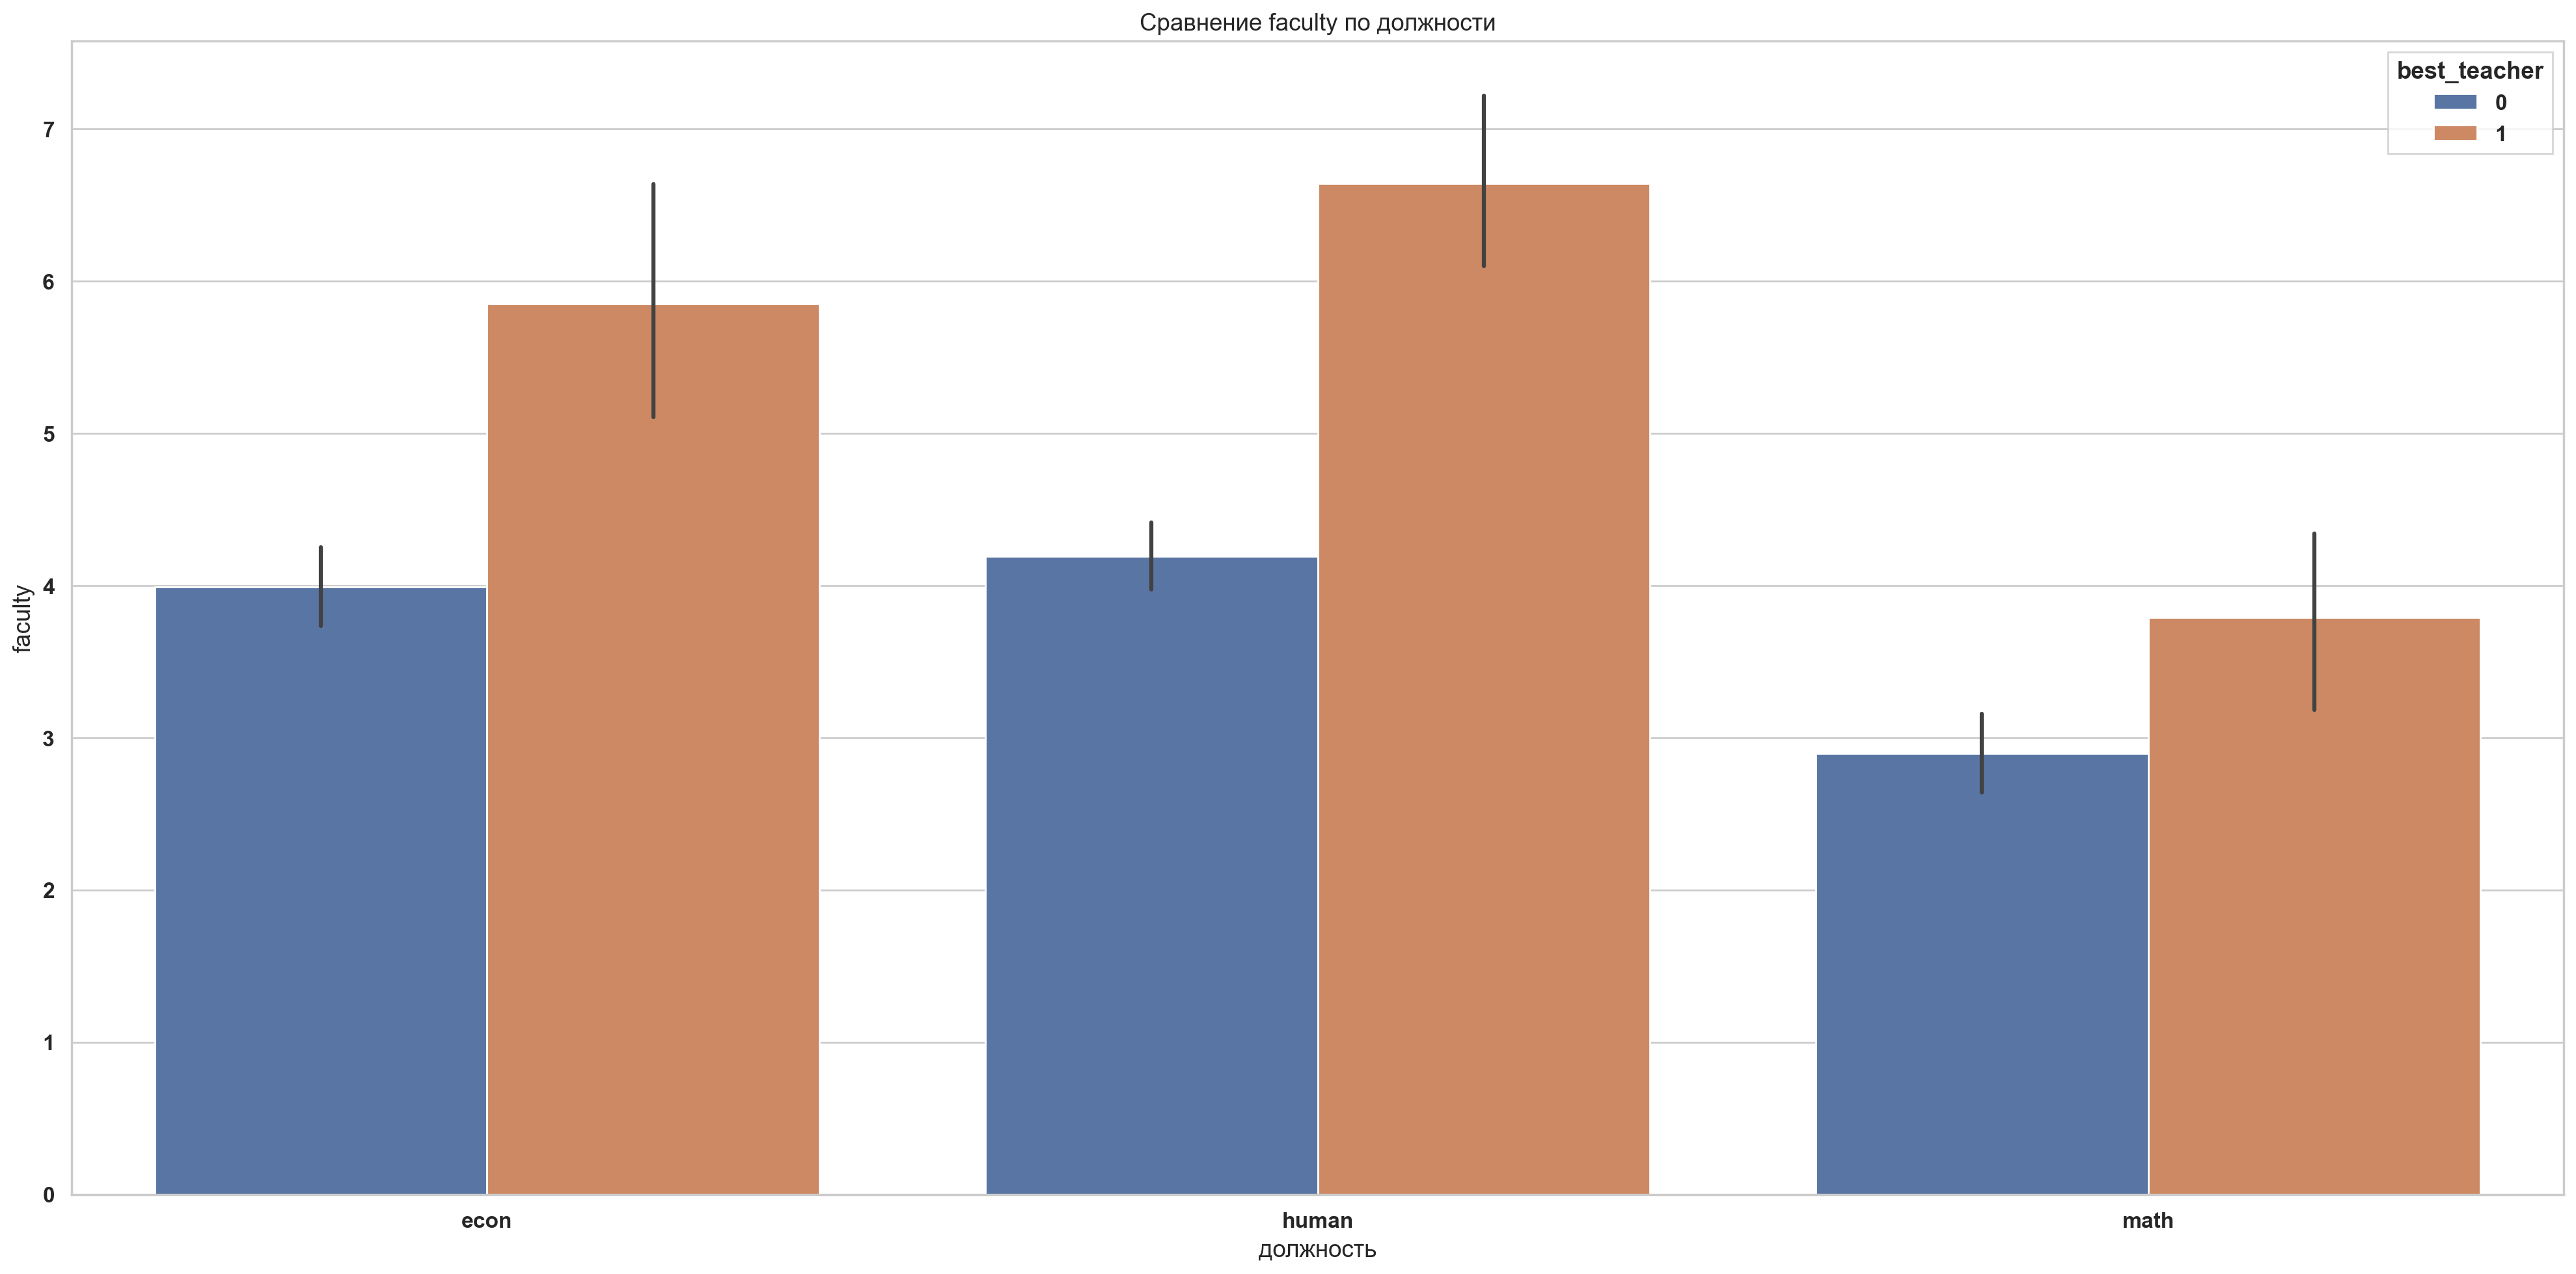

  gender  t_statistic       p_value  sample_size_head_1  sample_size_head_0  \
0      F     5.688684  3.477920e-08                 183                 969   
1      M     7.973957  3.442449e-14                 236                1084   

   mean_courses_head_1  mean_courses_head_0  total_observations  
0             5.546448             3.912281                1152  
1             6.588983             3.983395                1320  


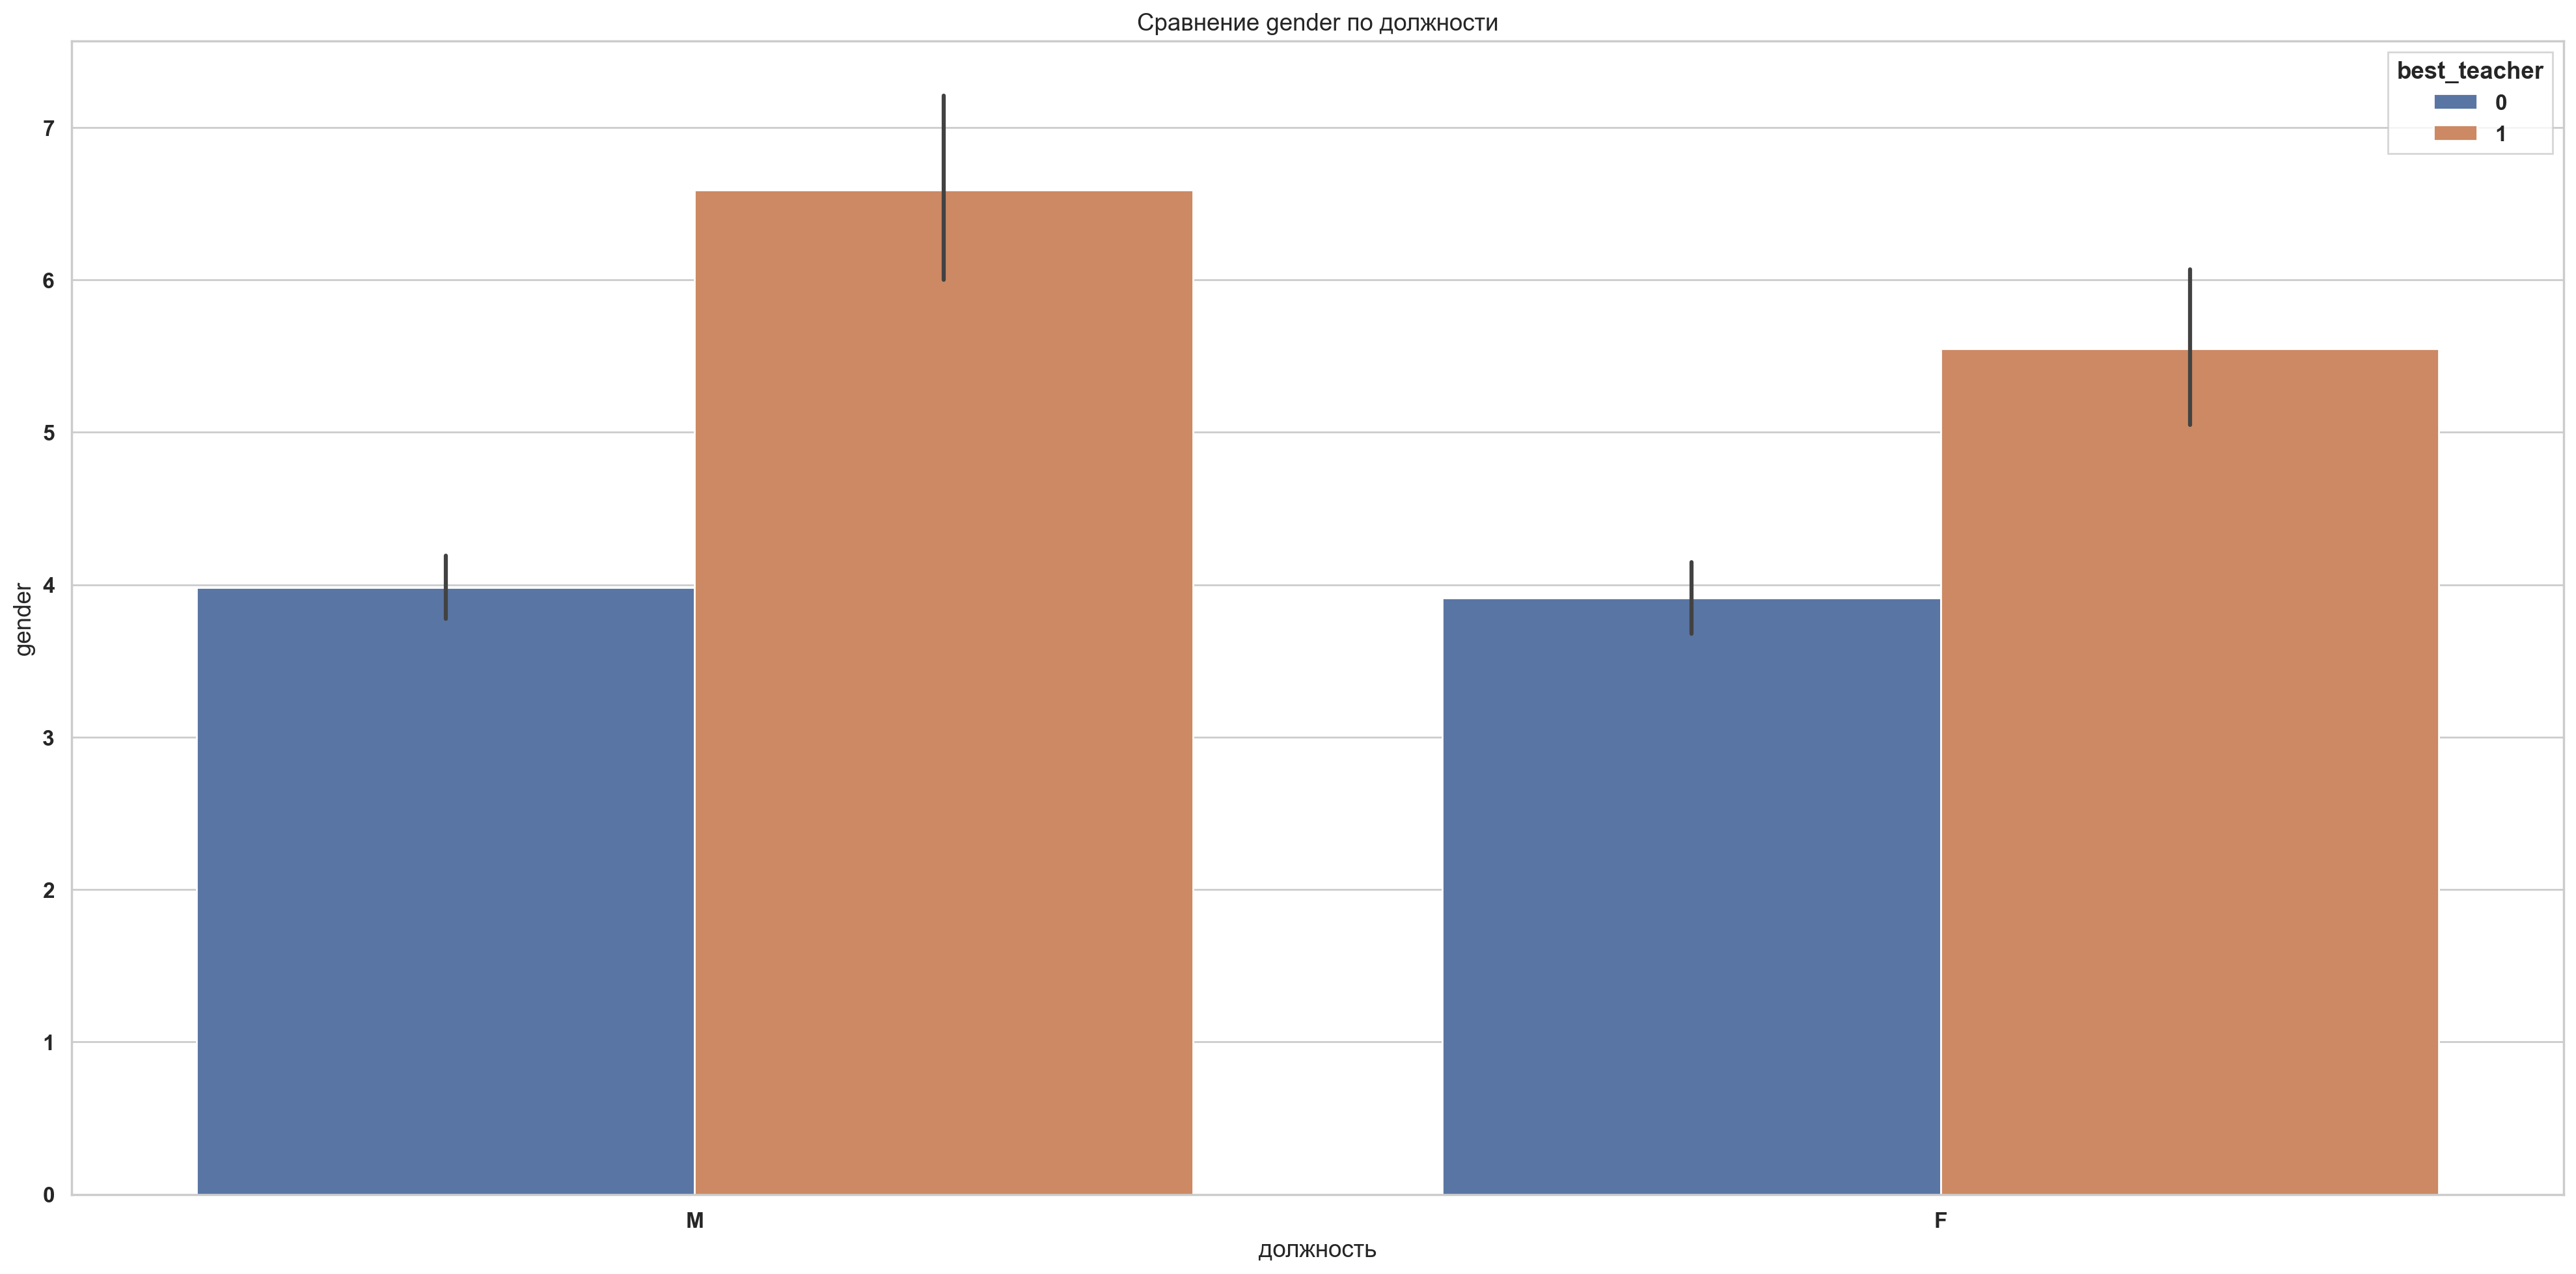

In [543]:
# проверка устойчивости

df = data.copy()
df = df[(df['teaching_position'] == 'ассистент') | (df['teaching_position'] == 'приглашенный преподаватель') | (df['teaching_position'] == 'преподаватель') | (df['teaching_position'] == 'старший преподаватель') | (df['teaching_position'] == 'доцент') | (df['teaching_position'] == 'профессор')]
for i in ['teaching_position', 'faculty', 'gender']:
    unique_A_values = sorted(df[f'{i}'].unique())

    df['A_group_label'] = df[f'{i}'].astype(str)

    results = []
    for a_value in unique_A_values:
        subset = df[df[f'{i}'] == a_value]
        group1 = subset[subset['best_teacher'] == 1]['courses_total']
        group0 = subset[subset['best_teacher'] == 0]['courses_total']
        
        if len(group1) > 0 and len(group0) > 0:
            t_stat, p_value = ttest_ind(group1, group0, equal_var=False)
            
            results.append({
                f'{i}': a_value,
                't_statistic': t_stat,
                'p_value': p_value,
                'sample_size_head_1': len(group1),
                'sample_size_head_0': len(group0),
                'mean_courses_head_1': group1.mean(),
                'mean_courses_head_0': group0.mean(),
                'total_observations': len(subset)
            })
        else:
            print(f"Недостаточно данных для f'{i}' = {a_value}")

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(f'{i}')
    print(results_df)

    plt.figure(figsize=(20, 10))
    sns.barplot(x=f'{i}', y='courses_total', hue='best_teacher', data=df)
    plt.title(f'Сравнение {i} по должности')
    plt.xlabel('должность')
    plt.ylabel(f'{i}')
    if i == 'teaching_position':
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### amount of facults

<Axes: xlabel='best_teacher', ylabel='courses_total'>

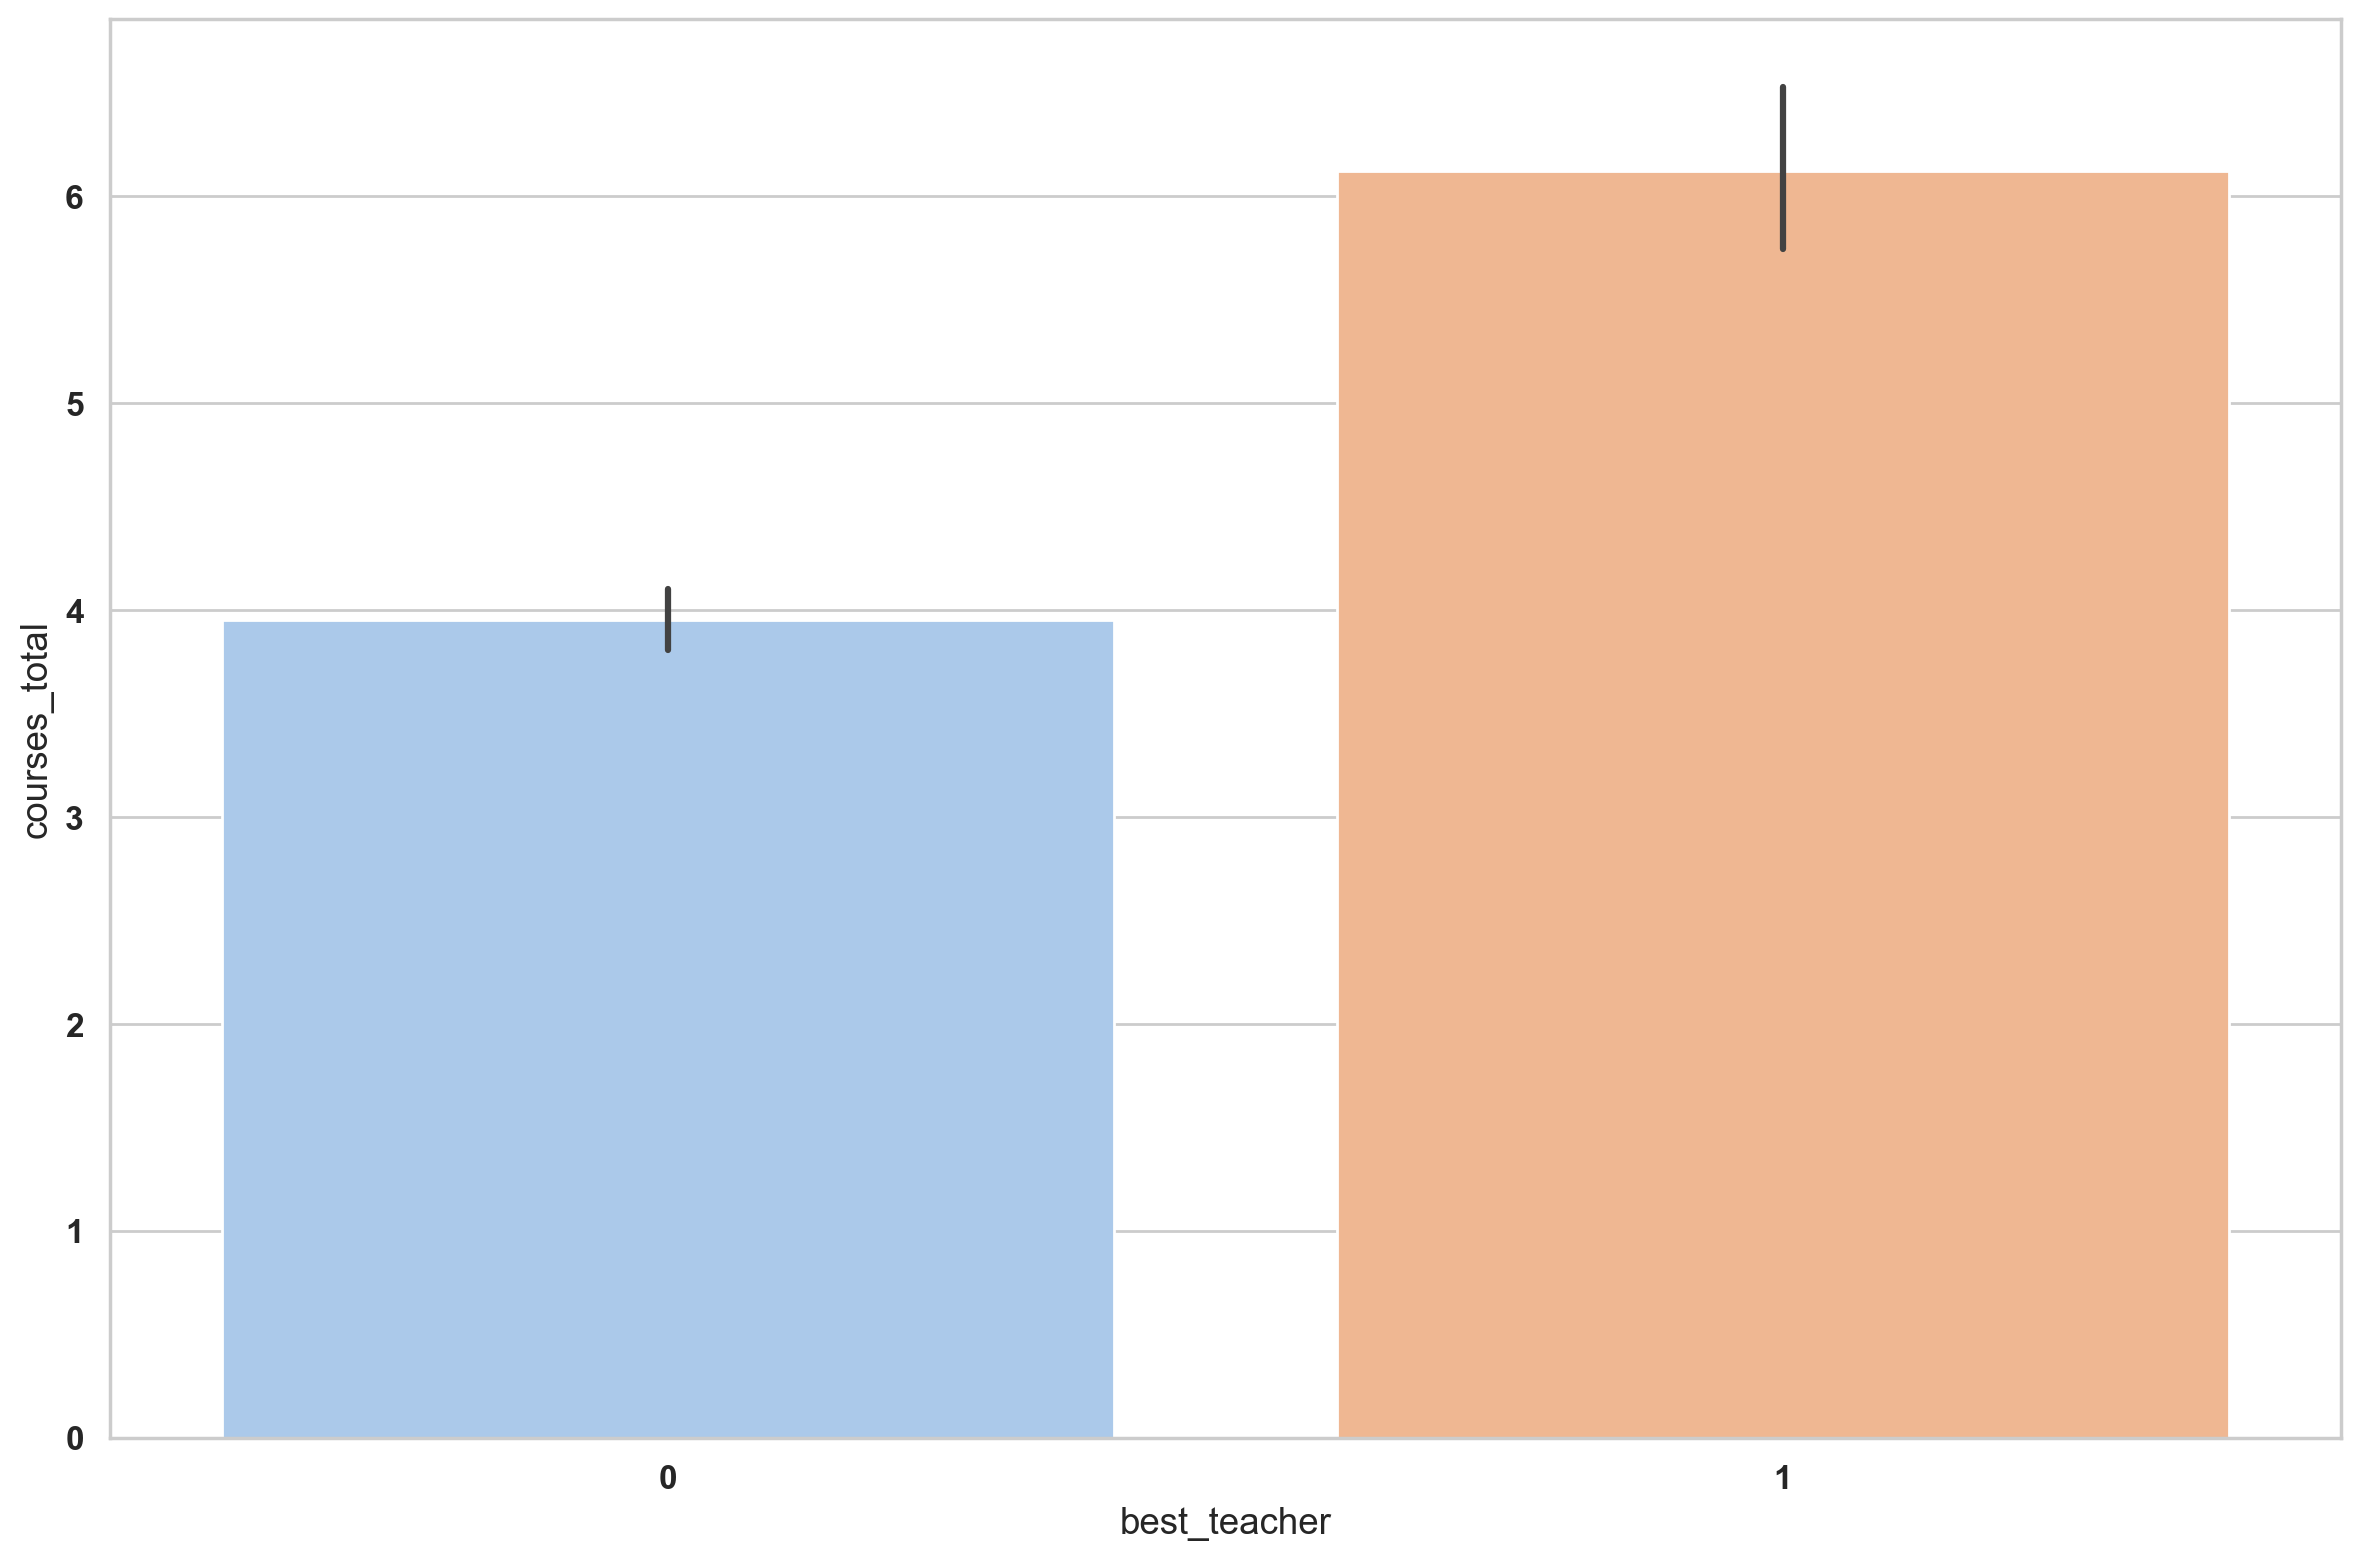

In [544]:
sns.barplot(
    data=data,
    y='courses_total',
    x='best_teacher',
    palette='pastel')

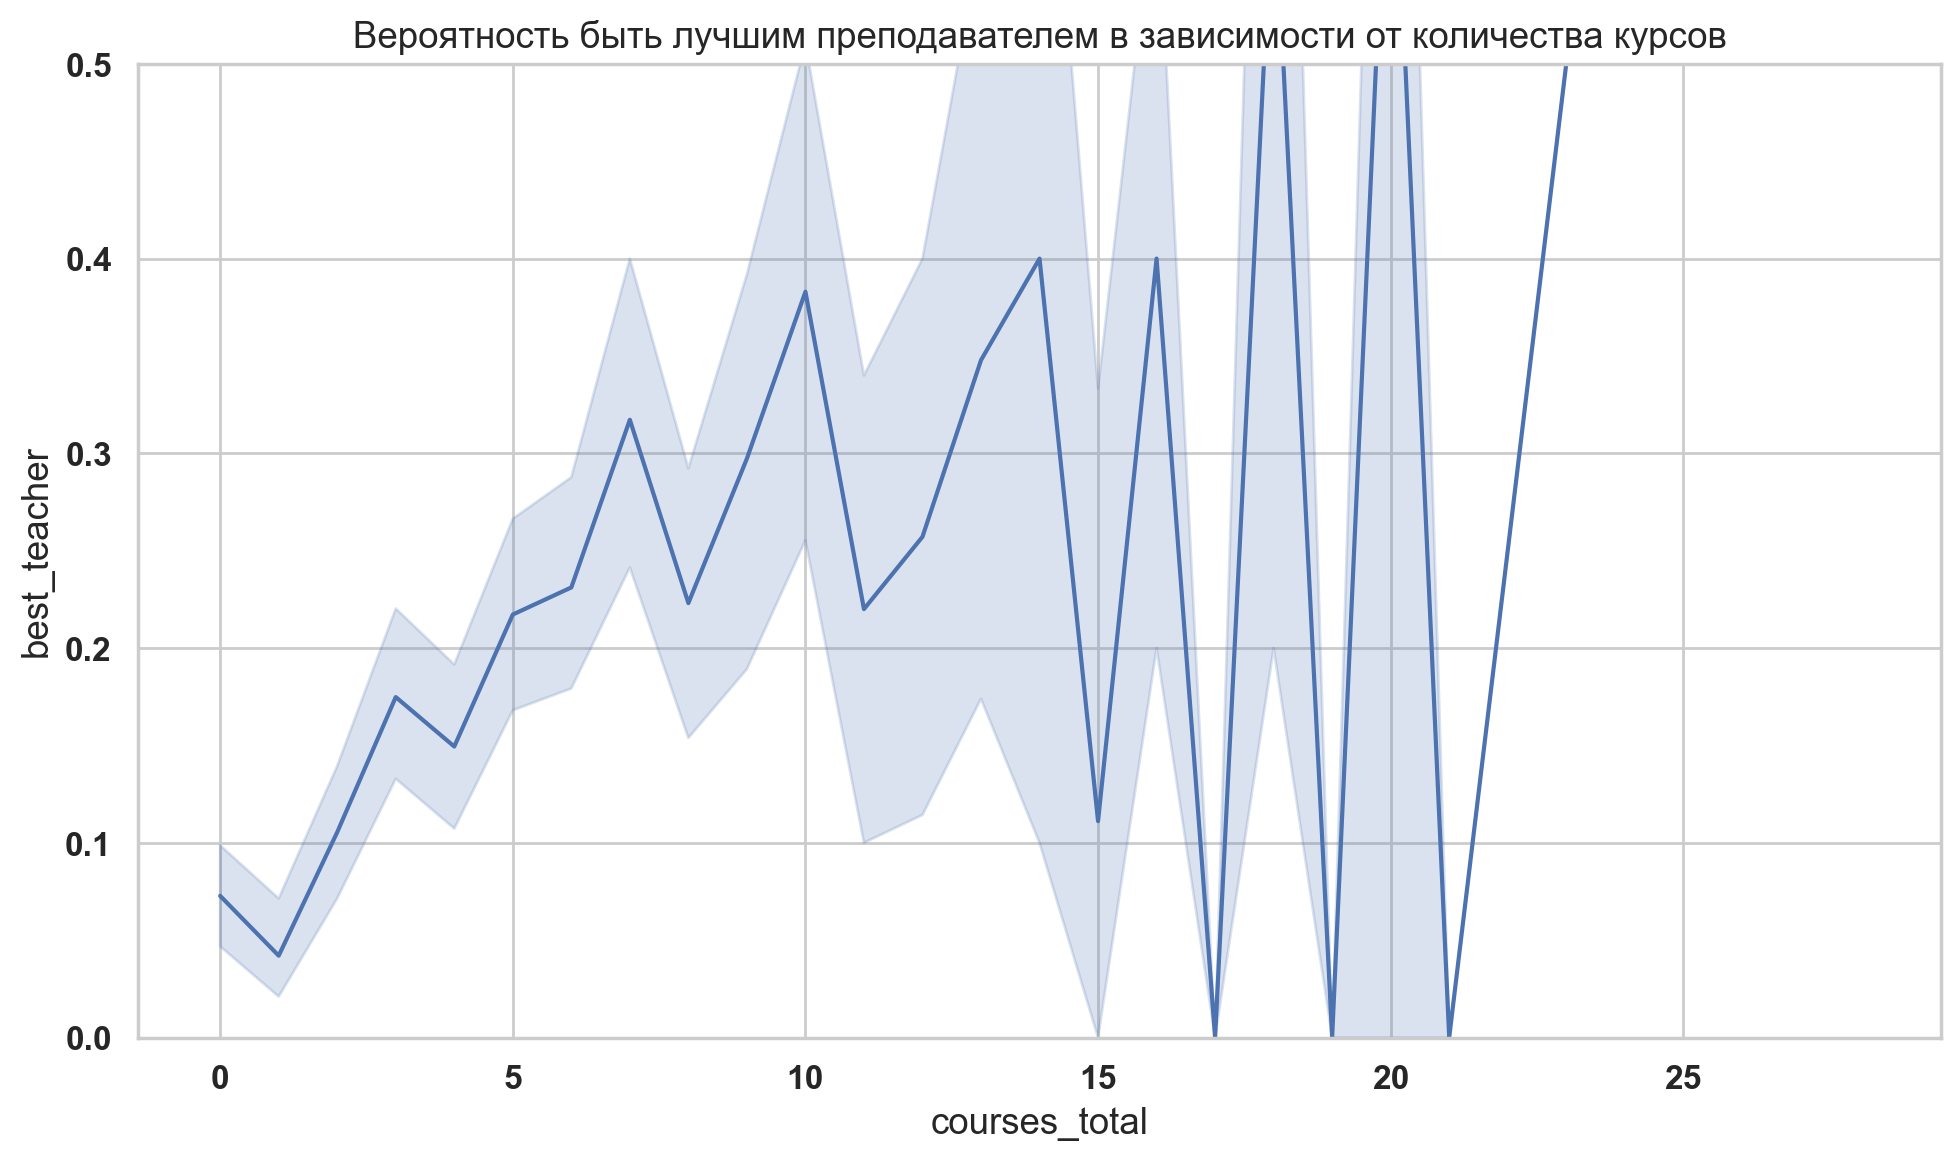

In [545]:
from scipy.stats import ttest_ind
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ваш DataFrame 'data' должен быть определен заранее

results = []
for i in range(1, 9):
    df = data.copy()
    df = df[(df['courses_total'] == i) | (df['courses_total'] == i + 1)]
    df['courses_total'] -= i
    group1 = df[df['best_teacher'] == 1]['courses_total']
    group0 = df[df['best_teacher'] == 0]['courses_total']

    if len(group1) > 0 and len(group0) > 0:
        t_stat, p_value = ttest_ind(group1, group0, equal_var=False)
        results.append({
            'sample': f'{i} - {i + 1}',
            't_statistic': t_stat,
            'p_value': p_value,
            'sample_size_head_1': len(group1),
            'sample_size_head_0': len(group0),
            'x_pos': i + 0.5,  # Позиция между i и i+1
            'y_pos': data[(data['courses_total'] == i) | (data['courses_total'] == i + 1)]
                      .groupby('courses_total')['best_teacher'].mean().max() + 0.02  # Выше максимума + отступ
        })

results_df = pd.DataFrame(results)

# Создаем график
plt.figure(figsize=(10, 6))
plt.ylim(0, 0.5)
sns.lineplot(data=data, x='courses_total', y='best_teacher', estimator='mean', ci=95)
plt.title('Вероятность быть лучшим преподавателем в зависимости от количества курсов')

# # Добавляем аннотации p-value
# for _, row in results_df.iterrows():
#     plt.text(
#         row['x_pos'], 
#         row['y_pos'], 
#         f'p={row["p_value"]:.3f}', 
#         ha='center', 
#         va='bottom',
#         fontsize=9,
#         # Исправленная строка кода с bbox
#         bbox=dict(boxstyle="round", pad=0.3, facecolor="lightgray", alpha=0.7)
#     )

plt.show()

In [558]:
data.to_csv('data_clean.csv', index=False)

In [1]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed


def func_value(x_list, function):
    curr = x_list.copy()
    if len(function) == 0:
        return curr
    for func in function:
        if func[0] == 'line':
            a, b = func[1], func[2]
            curr = a * curr + b
        elif func[0] == 'div':
            curr = 1 / curr
        elif func[0] == 'sin':
            curr = np.sin(curr)
        else:
            curr = np.cos(curr)
    return curr

def mse(x_list, y_list, function):
    curr = func_value(x_list, function)
    error = (y_list - curr) ** 2
    k = int(len(error) * 0.7 + 0.9)
    valid_error = np.partition(error, k)[:k]
    return np.mean(valid_error)

def find_func(x_list, y_list, function_list):
    solutions = []
    for function in function_list:
        current = func_value(x_list, function)
        for func in ['line', 'div', 'sin', 'cos']:
            if func != 'line':
                answer = function.copy()
                error = mse(current, y_list, [func])
                answer += [[func]]
                solutions += [[answer, error]]
                
                answer = function.copy()
                curr = func_value(x_list, [func])
                error = mse(curr, y_list, function)
                answer = [[func]] + answer
                solutions += [[answer, error]]
            else:
                answer = function.copy()
                
                num_iterations = 40
                best_error = float('inf')
                best_a, best_b = 1, 0
                for i in range(num_iterations):
                    indices = np.random.choice(len(current), 2, replace=False)
                    x_random = current[indices]
                    y_random = y_list[indices]
                    A = [[x_random[0], 1], [x_random[1], 1]]
                    a, b = np.linalg.lstsq(A, y_random)[0]
                    error = abs(y_list - (a * current + b))
                    k = int(error.size * 0.7 + 0.9)
                    valid_error = np.mean(np.partition(error, k)[:k])
                    if valid_error < best_error:
                        best_error = valid_error
                        best_a, best_b = a, b
                a, b = best_a, best_b
                a = np.clip(a, -2, 2)
                b = np.clip(b, -5, 5)
                
                answer += [['line', a, b]]
                solutions += [[answer, best_error]]
                
                answer = function.copy()
                
                num_iterations = 40
                best_error = float('inf')
                best_a, best_b = 1, 0
                for i in range(num_iterations):
                    indices = np.random.choice(len(current), 2, replace=False)
                    x_random = current[indices]
                    y_random = y_list[indices]
                    A = [[x_random[0], 1], [x_random[1], 1]]
                    a, b = np.linalg.lstsq(A, y_random)[0]
                    curr = a * current + b
                    valid_error = mse(curr, y_list, function)
                    if valid_error < best_error:
                        best_error = valid_error
                        best_a, best_b = a, b
                a, b = best_a, best_b
                a = np.clip(a, -2, 2)
                b = np.clip(b, -5, 5)
                
                curr = func_value(x_list, [['line', a, b]])
                error = mse(curr, y_list, function)
                answer = [['line', a, b]] + answer
                solutions += [[answer, best_error]]
    solutions.sort(key=lambda x: x[1])
    return solutions[:4]

def fast_work(x_list, y_list):
    sol = [[]]
    solve = []
    for j in range(15):
        best_sol = find_func(x_list, y_list, sol)
        solve += best_sol
        sol = best_sol.copy()
        sol = [x[0] for x in sol]
    solve.sort(key=lambda x: x[1])
    ans_func = solve[0]
    solution = func_value(x_list, ans_func[0])
    answer = []
    for value in solution:
        clamped_value = max(-10000, min(10000, value))
        answer.append(f"{clamped_value:.6f}")
    return answer


a = list(map(int, input().split(' ')))
n = a[0]
m = a[1]
x_list = []
for i in range(1, m + 1):
    x_list.append(i)
x_list = np.array(x_list)
y_lists = []
for i in range(n):
    y_lists.append(np.array(list(map(float, input().split()))))
final_solution = []
for i, y_list in enumerate(y_lists):
    result = fast_work(x_list, y_list)
    final_solution.append((i, result))
for ind, solution in sorted(final_solution, key=lambda x: x[0]):
    print(" ".join(solution))

0.000000 0.000000 0.000000 0.000000
0.100000 0.200000 0.300000 0.400000


/var/folders/06/hd6nt7pn27b8kgr8yl2x_zyh0000gn/T/ipykernel_2266/3666220677.py:16: RuntimeWarning: divide by zero encountered in divide
  curr = 1 / curr
/var/folders/06/hd6nt7pn27b8kgr8yl2x_zyh0000gn/T/ipykernel_2266/3666220677.py:14: RuntimeWarning: invalid value encountered in multiply
  curr = a * curr + b
